*Muestro más abajo las descripciones de cada columna:*

- ***Age***: Age of the patient (years)
- ***Sex***: Sex of the patient (M: Male, F: Female)
- ***ChestPainType***: Chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
- ***RestingBP***: Resting blood pressure (mm Hg)
- ***Cholesterol***: Serum cholesterol (mm/dl)
- ***FastingBS***: Fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
- ***RestingECG***: Resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- ***MaxHR***: Maximum heart rate achieved (Numeric value between 60 and 202)
- ***ExerciseAngina***:  Exercise-induced angina (Y: Yes, N: No)
- ***Oldpeak***: Oldpeak = ST (Numeric value measured in depression)
- ***ST_Slope***: The slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
- ***HeartDisease***: Output class (1: heart disease, 0: Normal)

In [1]:
# Importamos las librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import shapiro # Para comprobar que las distribuciones son normales
from scipy.stats import anderson # Test de bondad de ajuste de datos a distribución

from Funciones import pinta_distribucion_categoricas, plot_multiple_boxplots, card_tipo, plot_histo_den, grafico_dispersion_con_correlacion, bubble_plot, \
    plot_categorical_relationship_fin, plot_categorical_numerical_relationship, plot_grouped_boxplots, plot_grouped_histograms

In [2]:
# Abrimos el archivo csv en un dataset

df = pd.read_csv("../data/heart.csv")

## EXPLORACIÓN INICIAL

In [3]:
# Visualizamos el dataframe

pd.set_option("display.max_columns", None) # Así vemos todas las columnas
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
# Vamos a ver los valores únicos de las diferentes columnas a ver si hay algo raro

for columna in df.columns:
    print(f"{columna}: {df[columna].sort_values().unique()}")
    print("--------------")

Age: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]
--------------
Sex: ['F' 'M']
--------------
ChestPainType: ['ASY' 'ATA' 'NAP' 'TA']
--------------
RestingBP: [  0  80  92  94  95  96  98 100 101 102 104 105 106 108 110 112 113 114
 115 116 117 118 120 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 148 150 152 154 155 156
 158 160 164 165 170 172 174 178 180 185 190 192 200]
--------------
Cholesterol: [  0  85 100 110 113 117 123 126 129 131 132 139 141 142 147 149 152 153
 156 157 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 190 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247

*Me da que tenemos un valor raro: Cholesterol y RestingBP = 0 (no puede ser como valor de una medición)*

In [5]:
# Vemos la descripción general matemática de los valores numéricos

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


*En principio se deja entre ver que para las 7 variables numéricas mostradas arriba no hay valores nulos*

In [6]:
# Vemos información más completa de las variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Comprobamos si hay valores nulos

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

*Efectivamente, se ratifica que no hay valores nulos en ninguna de las columnas*

In [8]:
# Comprobamos si hay valores duplicados

df.duplicated(keep = False).value_counts()

False    918
Name: count, dtype: int64

*Tampoco hay valores duplicados*

In [9]:
# Vamos a convertir las variables "FastingBS y HeartDisease como categóricas ya que las está tratando como numéricas, así facilitamos los análisis posteriores"

df_exp = df.copy()
df_exp["FastingBS"] = df_exp["FastingBS"].astype("category")
df_exp["HeartDisease"] = df_exp["HeartDisease"].astype("category")
df_exp

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    object  
 2   ChestPainType   918 non-null    object  
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    object  
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    object  
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    object  
 11  HeartDisease    918 non-null    category
dtypes: category(2), float64(1), int64(4), object(5)
memory usage: 73.9+ KB


## ANÁLISIS

In [11]:
# Vamos a calcular la cardinalidad

card_tipo(df_exp)

,Card,%_Card,Tipo,tipo_sugerido
Age,50,5.446623,int64,Numerica discreta
Sex,2,0.217865,object,Binaria
ChestPainType,4,0.43573,object,Categorica
RestingBP,67,7.298475,int64,Numerica discreta
Cholesterol,222,24.183007,int64,Numerica discreta
FastingBS,2,0.217865,category,Binaria
RestingECG,3,0.326797,object,Categorica
MaxHR,119,12.962963,int64,Numerica discreta
ExerciseAngina,2,0.217865,object,Binaria
Oldpeak,53,5.77342,float64,Numerica discreta


Completamos todo lo que sepamos de los datos:

|Columna/variable| Descripción| Tipo de variable| Importancia inicial| Notas|
|-|-|-|-|-|
|Age| Age of the patient (years)| Numérica discreta| 0|
|Sex| Sex of the patient (M: Male, F: Female)| Binaria| 0|
|ChestPainType| Chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)| Categórica nominal| 0| 
|RestingBP| Resting blood pressure (mm Hg)| Numérica discreta| 0|
|Cholesterol| Serum cholesterol (mm/dl)| Numérica discreta| 0| 
|FastingBS| Fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)| Binaria| 0|
|RestingECG| Resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)| Categórica nominal| 1|
|MaxHR| Maximum heart rate achieved (Numeric value between 60 and 202)| Numérica discreta| 0| 
|ExerciseAngina| Exercise-induced angina (Y: Yes, N: No)| Binaria| 0| 
|Oldpeak| Oldpeak = ST (Numeric value measured in depression)| Numérica discreta| 2|
|ST_Slope| The slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)| Categórica nominal| 2|
|HeartDisease| Output class (1: heart disease, 0: Normal)| Binaria| 0|

In [12]:
# Definimos dos listas: una para las variables númericas y otra para las categóricas

cols_numericas = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", ]

cols_categoricas_nominales = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

### ANÁLISIS UNIVARIANTE

#### TENDENCIA CENTRAL

In [13]:
# Obtenemos la media de las columnas numéricas

for i in cols_numericas:
    print(f"{i}: {df_exp[i].describe().loc["mean"]}")

Age: 53.510893246187365
RestingBP: 132.39651416122004
Cholesterol: 198.7995642701525
MaxHR: 136.80936819172112
Oldpeak: 0.8873638344226579


In [14]:
# Obtenemos la mediana de las columnas numéricas

for i in cols_numericas:
    print(f"{i}: {df_exp[i].describe().loc["50%"]}")

Age: 54.0
RestingBP: 130.0
Cholesterol: 223.0
MaxHR: 138.0
Oldpeak: 0.6


In [15]:
# Obtenemos la moda de las columnas categóricas nominales

df_exp[cols_categoricas_nominales].mode().T

,0
Sex,M
ChestPainType,ASY
FastingBS,0
RestingECG,Normal
ExerciseAngina,N
ST_Slope,Flat
HeartDisease,1


*En primer lugar se observa que las medias y las medianas de las variables "Age", "RestingBP", "MaxHR" y "Oldpeak" son muy similares, por lo que se podría indicar que los datos son bastante simétricos.* \
*Sin embargo, en la variable "Cholesterol" la media y mediana diferen más, por lo que los datos no son simétricos*\
*Además:*
- *La edad de la población está en torno a 53-54 años*
- *La presión arterial en reposo está en torno a 130-132*
- *El colesterol está, en un valor medio de 198, mientras que el 50% de la muestra (mediana) está en 223*
- *Las pulsaciones máximas están en torno a 137*
- *Y el índice utilizado en medida de la depresión está en 0.6-0.8*

*Finalmente:*
- *El sexo que más aparece es "Male"*
- *La mayoría de la muestra es asintomática*
- *El azúcar en sangre en ayunas está por debajo de 120*
- *El electrocardiograma en reposo es normal*
- *No hay angina inducida por el ejercicio*
- *La pendiente del segmento ST del ejercicio máximo es plana*
- *La mayoría han padecido enfermedad cardíaca*

#### FRECUENCIAS

##### ABSOLUTAS

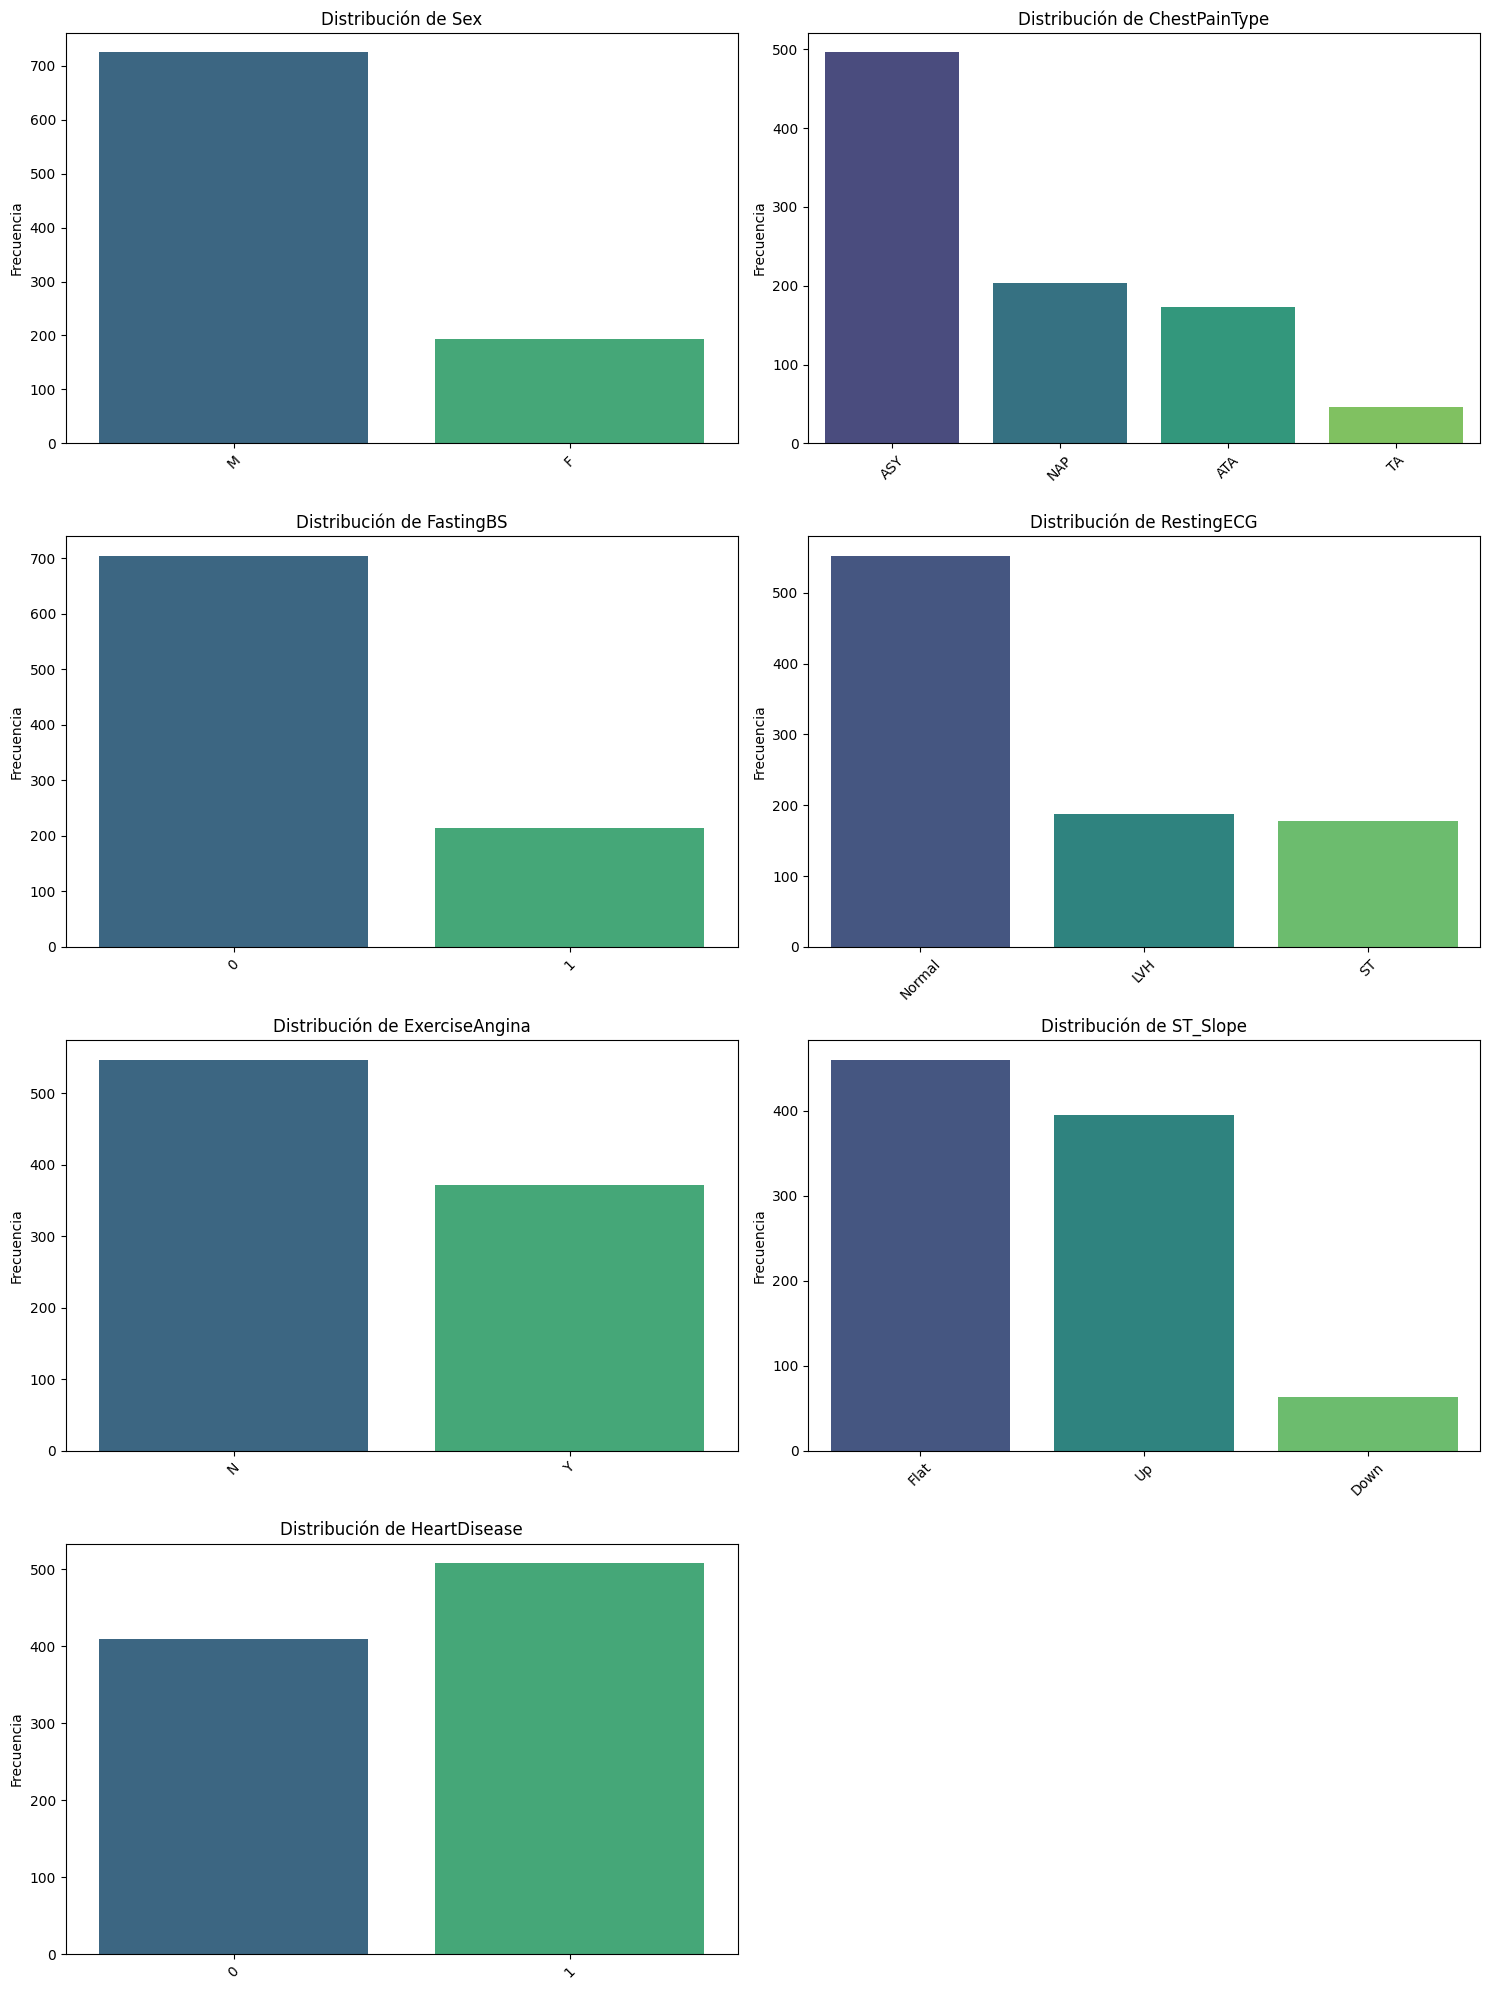

In [16]:
pinta_distribucion_categoricas(df_exp, cols_categoricas_nominales)

##### RELATIVAS

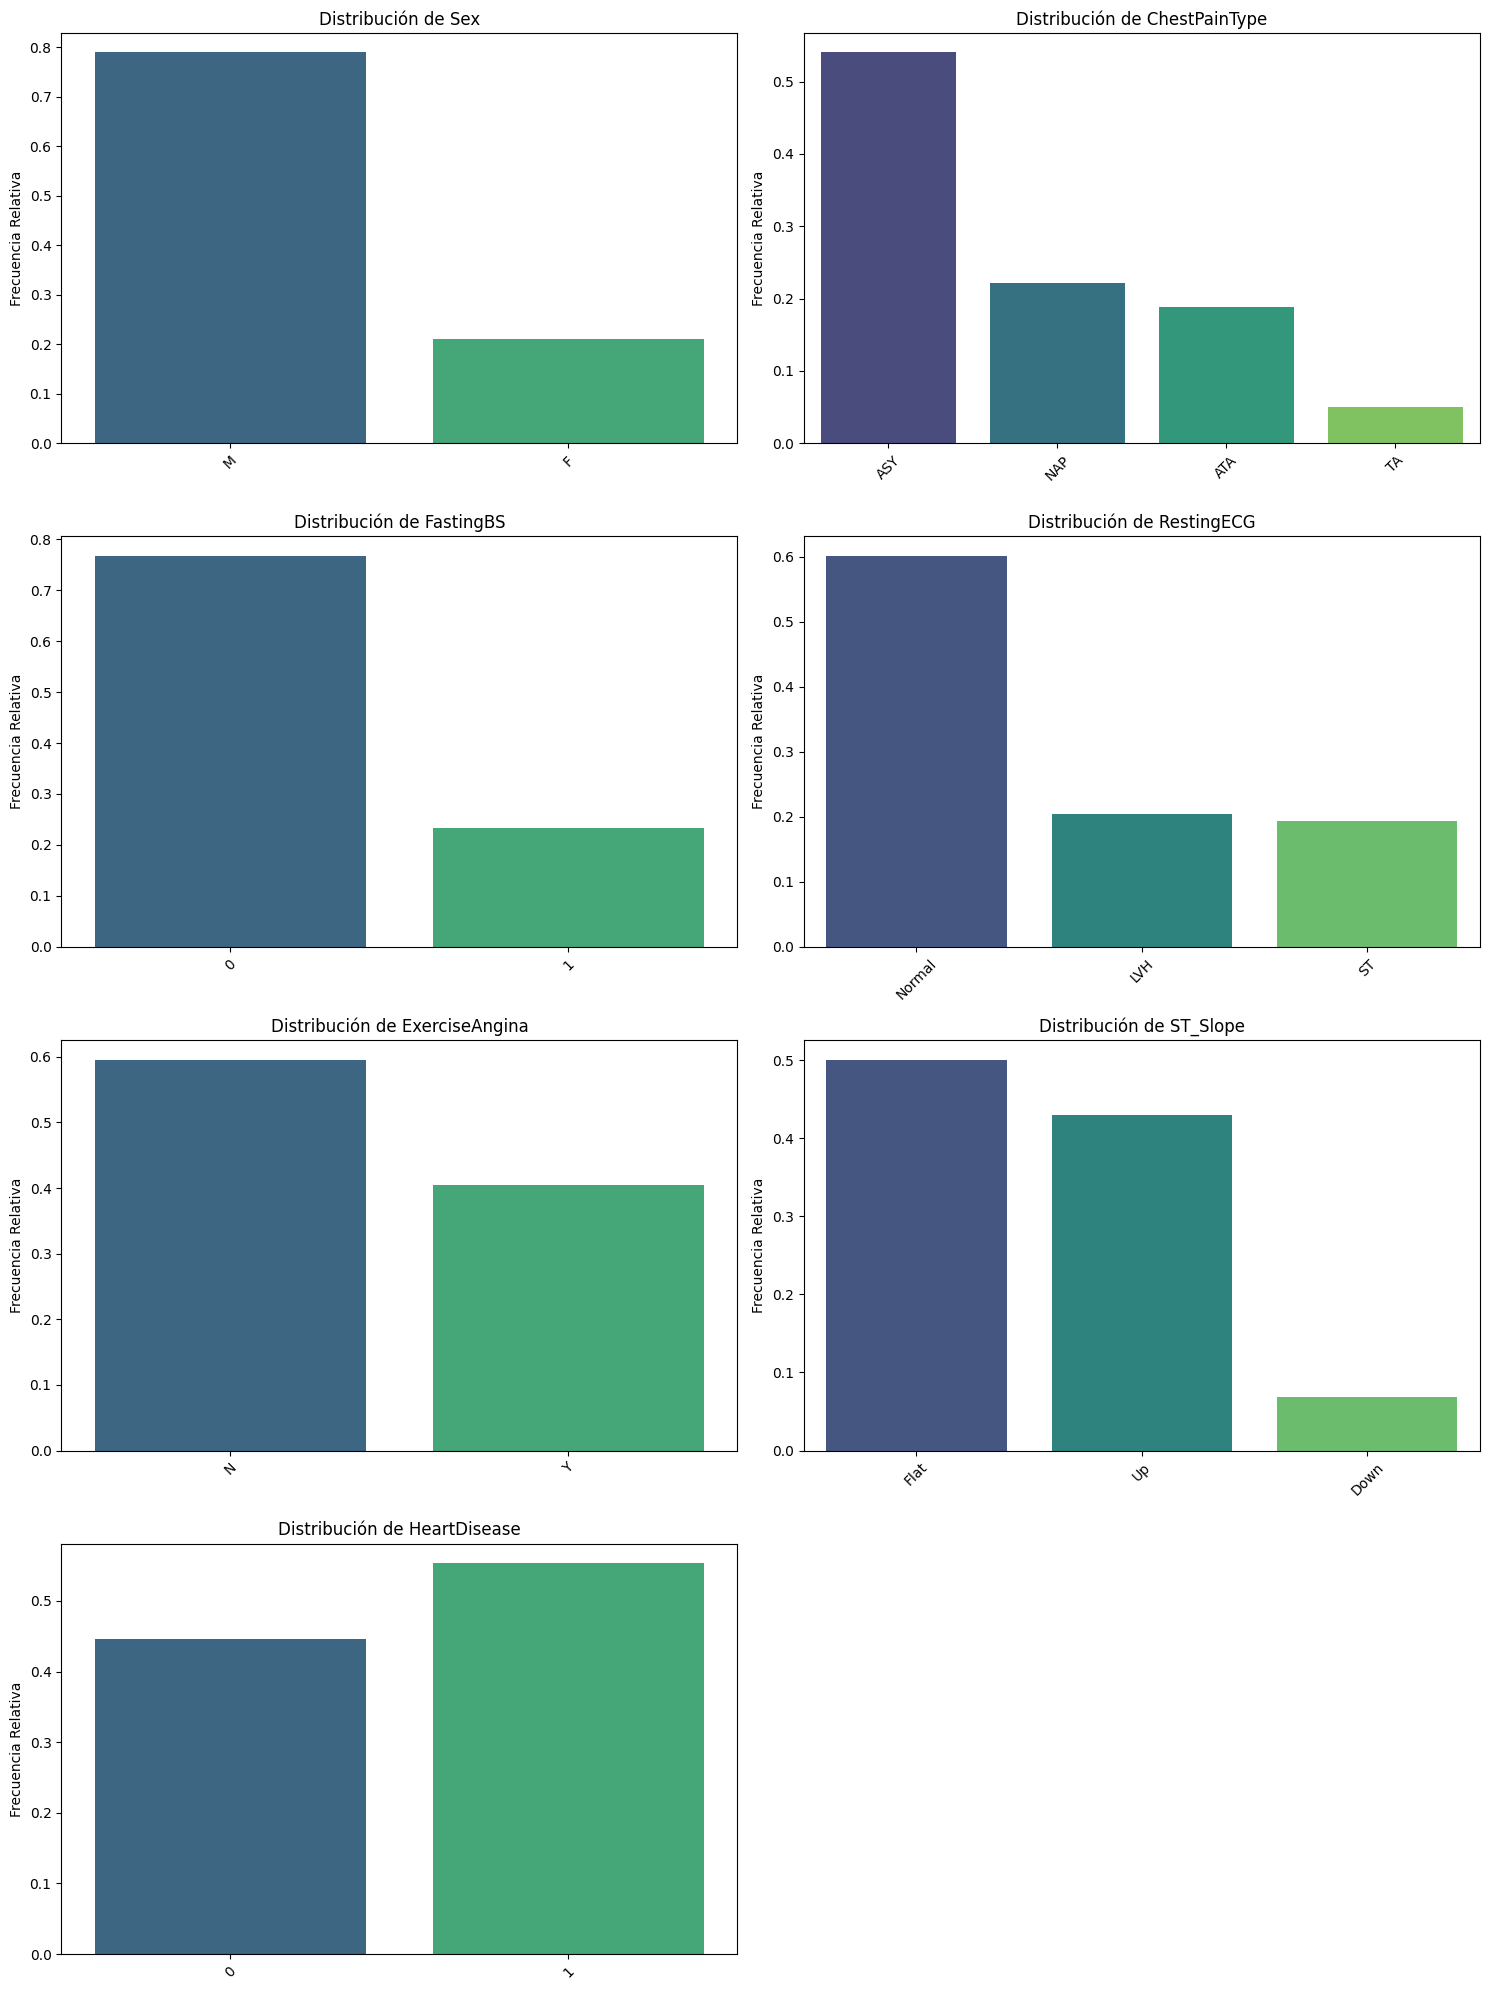

In [17]:
pinta_distribucion_categoricas(df_exp, cols_categoricas_nominales, relativa=True)

*Temas:*

- *La proporción de hombres es mayor que de mujeres (casi 80% vs 20%)*
- *La proporción de asintomáticos es bastante importante (55%)*
- *El azúcar en sangre en ayunas por debajo de 120 prevalece por mucho (casi 80%)*
- *ECG en reposo es normal en la gran mayoría de los casos (60%)*
- *Prevalece que no haya angina inducida por el ejercicio (60%)*
- *La pendiente ST está repartida principamente entre plano (50%) y alto (45%)*
- *Las afecciones están repartidas (55% sí que ha tenido problema cardíaco vs 45% que no)*

#### MEDIDAS DE POSICIÓN

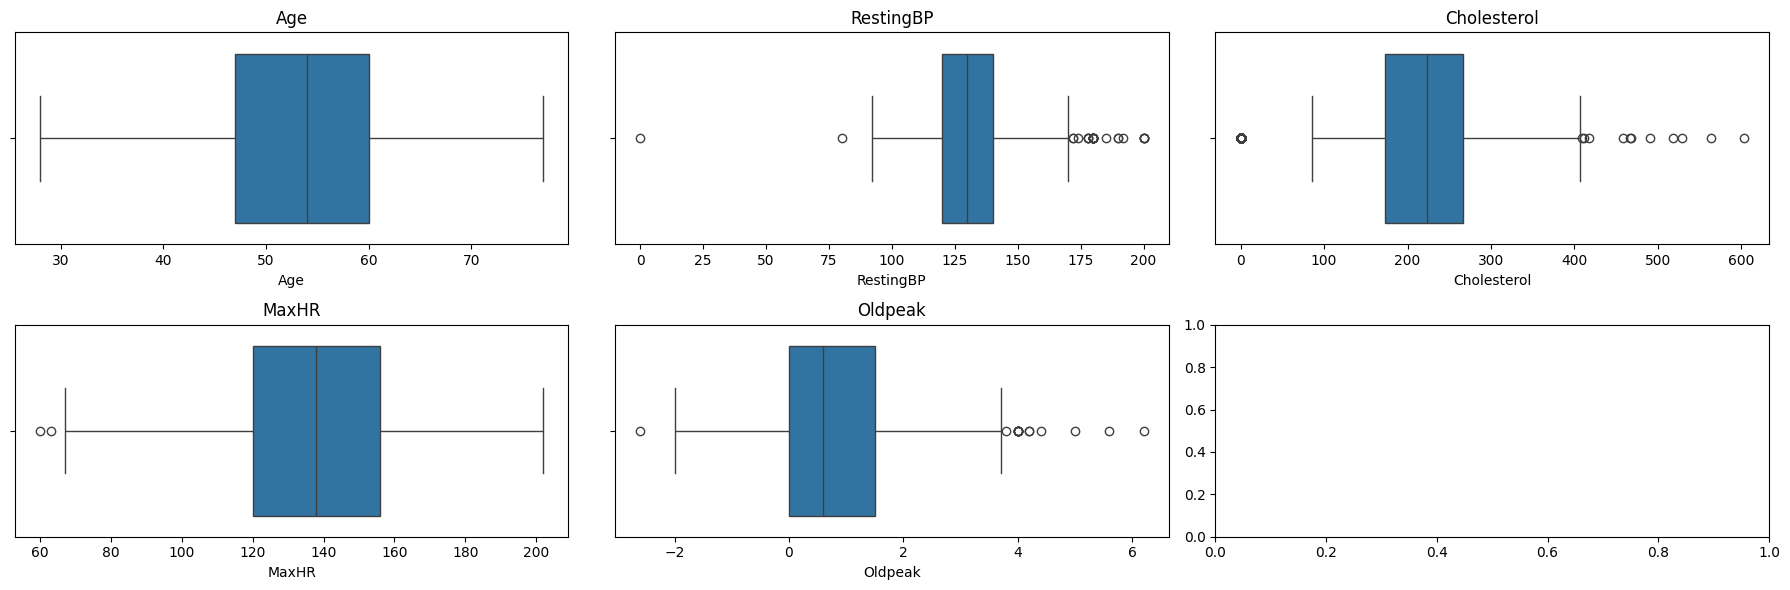

In [18]:
plot_multiple_boxplots(df_exp, cols_numericas)

In [19]:
for columna in cols_numericas:
    IQR = df_exp[columna].describe().loc["75%"] - df_exp[columna].describe().loc["25%"]
    rango = df_exp[columna].describe().loc["max"] - df_exp[columna].describe().loc["min"]
    IQR_porcentaje = (IQR/rango) * 100
    print(f"IQR de {columna}: {IQR_porcentaje}")

IQR de Age: 26.53061224489796
IQR de RestingBP: 10.0
IQR de Cholesterol: 15.547263681592039
IQR de MaxHR: 25.352112676056336
IQR de Oldpeak: 17.045454545454543


In [20]:
# Función para encontrar outliers

def encontrar_outliers(df):
    
    dict_outliers = {}

    for columna in cols_numericas:

        valores = []

        Q1 = df[columna].describe().loc["25%"]
        Q3 = df[columna].describe().loc["75%"]

        IQR = Q3 - Q1   

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        for i in df_exp[columna]:
            if i < limite_inferior or i > limite_superior:
                valores.append(i)

        dict_outliers[columna] = valores 

    return dict_outliers

In [21]:
dict_outliers = encontrar_outliers(df_exp)

In [22]:
for clave, valor in dict_outliers.items():
    print(f"Columna: {clave}") 
    print(f"Outliers: {sorted(valor)}")
    print(f"Cantidad outliers: {len(valor)}")
    print(f"Outliers únicos: {sorted(list(set(valor)))}")
    print(f"Cantidad de outliers únicos: {len(list(set(valor)))}\n")
    print("---------------")

Columna: Age
Outliers: []
Cantidad outliers: 0
Outliers únicos: []
Cantidad de outliers únicos: 0

---------------
Columna: RestingBP
Outliers: [0, 80, 172, 172, 174, 178, 178, 178, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 185, 190, 190, 192, 200, 200, 200, 200]
Cantidad outliers: 28
Outliers únicos: [0, 80, 172, 174, 178, 180, 185, 190, 192, 200]
Cantidad de outliers únicos: 10

---------------
Columna: Cholesterol
Outliers: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 409, 412, 417, 458, 466, 468, 491,

*En el ámbito de la salud suele indicarse como valor '0' a aquellas medidas en las que no se dipone de dato/lectura y se suele atribuir dicho valor a la mediana* \
*En este caso, para la variable "Cholesterol" vamos a hacer eso mismo, ya que eliminar 183 valores de un conjunto de datos de 918 filas me parece demasiado (corresponde a un 20%)*

In [23]:
# Vamos a calcular la mediana del "Cholesterol" obviando los valores de "0"

mediana_colesterol_sin_ceros = df_exp[df_exp["Cholesterol"] != 0]["Cholesterol"].median()

df_1 = df_exp.copy()

df_1["Cholesterol"] = df["Cholesterol"].apply(lambda x: mediana_colesterol_sin_ceros if x == 0 else x)


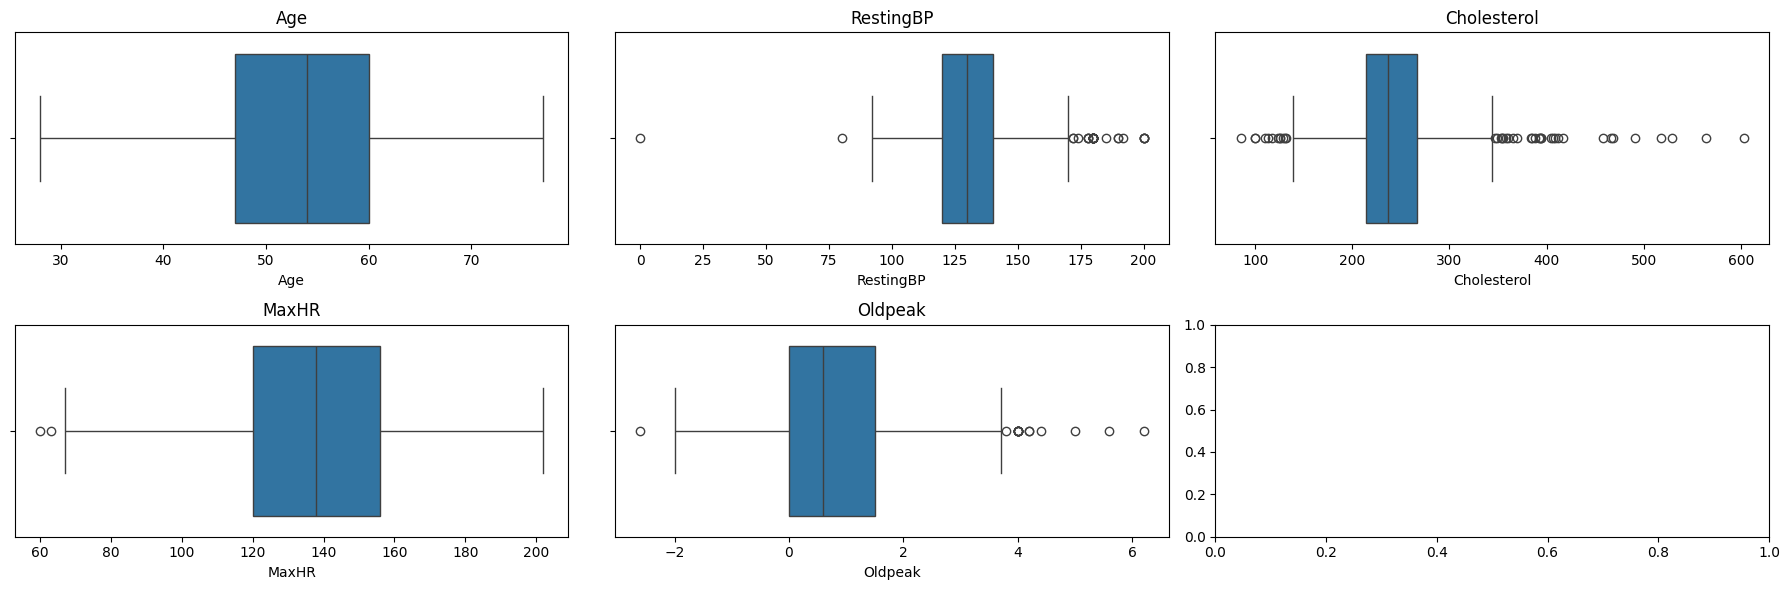

In [24]:
# Vamos a volver a calcular los boxplot

plot_multiple_boxplots(df_1, cols_numericas)

*Temas:*

- *Se aprecian outliers en todas las variables menos "Age"*
- *En la mayoría de casos se ve cierta simetría de los datos dentro del rango intercuartílico (las cajas a cada lado de la mediana son bastante similares). Donde menos se aprecia sería en "Oldpeak"*
- *"Age", "MaxHR" y "Oldpeak" tienen unos bigotes más largos por lo que sugiere mayor dispersión de los valores*

In [25]:
dict_outliers = encontrar_outliers(df_1)

In [26]:
for clave, valor in dict_outliers.items():
    print(f"Columna: {clave}") 
    print(f"Outliers: {sorted(valor)}")
    print(f"Cantidad outliers: {len(valor)}")
    print(f"Outliers únicos: {sorted(list(set(valor)))}")
    print(f"Cantidad de outliers únicos: {len(list(set(valor)))}\n")
    print("---------------")

Columna: Age
Outliers: []
Cantidad outliers: 0
Outliers únicos: []
Cantidad de outliers únicos: 0

---------------
Columna: RestingBP
Outliers: [0, 80, 172, 172, 174, 178, 178, 178, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 185, 190, 190, 192, 200, 200, 200, 200]
Cantidad outliers: 28
Outliers únicos: [0, 80, 172, 174, 178, 180, 185, 190, 192, 200]
Cantidad de outliers únicos: 10

---------------
Columna: Cholesterol
Outliers: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 85, 100, 100, 110, 113, 117, 123, 

*Vamos a eliminar ahora el resto de outliers*

In [27]:
condicion_1 = (df_1["RestingBP"] > 80) & (df_1["RestingBP"] < 172)
df_2 = df_1[condicion_1]

condicion_2 = (df_2["Cholesterol"] > 132) & (df_2["Cholesterol"] < 347)
df_3 = df_2[condicion_2]

df_4 = df_3[df_3["MaxHR"] > 63]

condicion_3 = (df_4["Oldpeak"] > -2.6) & (df_4["Oldpeak"] < 3.8)
df_5 = df_4[condicion_3]

In [28]:
df_uso = df_5.copy()
df_uso

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241.0,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


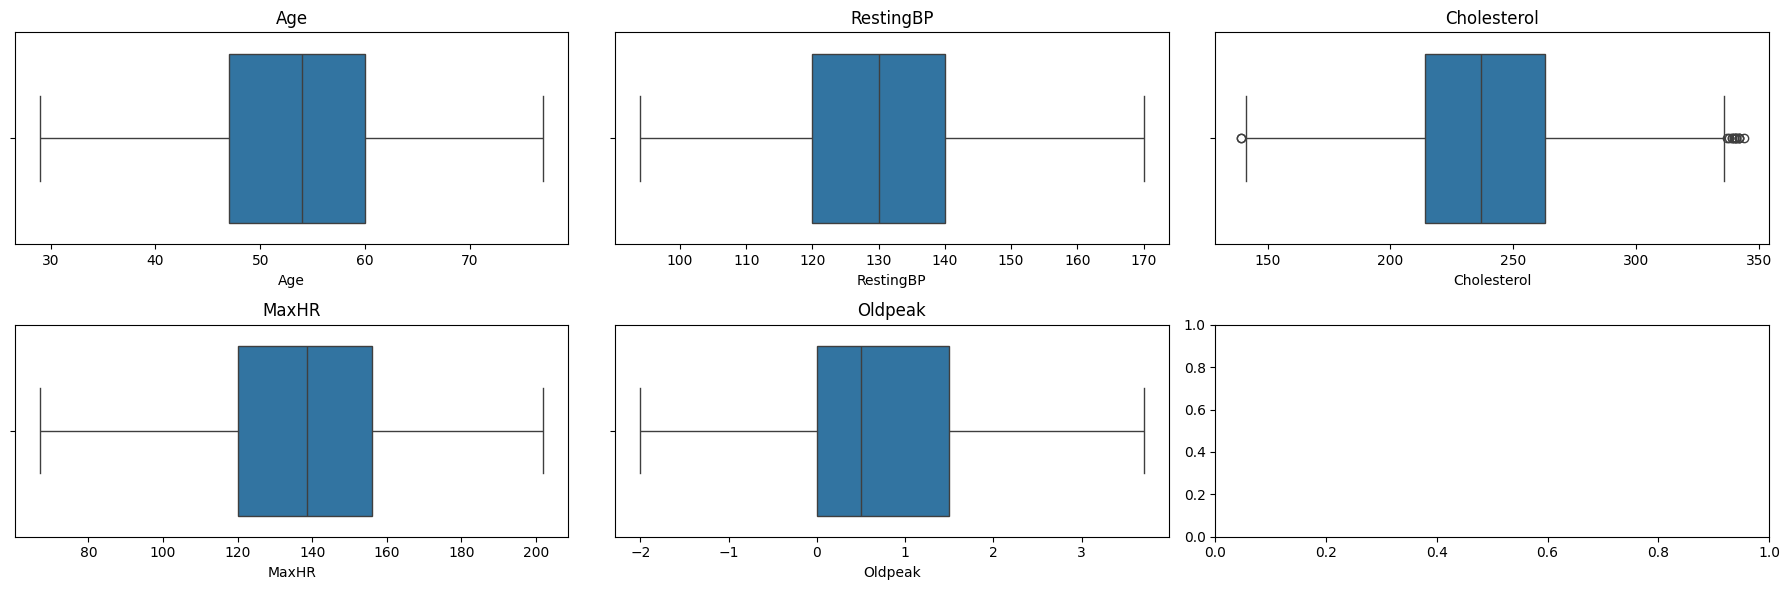

In [29]:
# Vamos a volver a calcular los boxplot

plot_multiple_boxplots(df_uso, cols_numericas)

In [30]:
df_uso.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,836.0,53.301435,9.454843,29.0,47.0,54.0,60.0,77.0
RestingBP,836.0,130.791866,15.767388,94.0,120.0,130.0,140.0,170.0
Cholesterol,836.0,238.561005,40.075884,139.0,214.0,237.0,263.0,344.0
MaxHR,836.0,137.233254,25.288977,67.0,120.0,138.5,156.0,202.0
Oldpeak,836.0,0.827751,0.971779,-2.0,0.0,0.5,1.5,3.7


*Temas tras eliminar outliers:*

- *Se siguen apreciando outliers en la variable "Cholesterol", pero en este caso por el momento los mantenemos*
- *En la mayoría de casos se ve cierta simetría de los datos dentro del rango intercuartílico (las cajas a cada lado de la mediana son bastante similares). Donde menos se aprecia sería en "Oldpeak". Lo podemos apreciar mejor en la tabla del describe*

In [31]:
# Vamos a calcular la desviación estándar de las variables numéricas

def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = (df_var["std"]/df_var["mean"])*100
    return df_var

In [32]:
variabilidad(df_uso)

,std,mean,CV
Age,9.454843,53.301435,17.738440
RestingBP,15.767388,130.791866,12.055328
Cholesterol,40.075884,238.561005,16.799009
MaxHR,25.288977,137.233254,18.427733
Oldpeak,0.971779,0.827751,117.399908


*"RestingBP" tiene baja variabilidad (CV < 15%)* \
*"Age", "Cholesterol" y "MaxHR" tienen una variabilidad moderada (CV > 30%)* \
*"Oldpeak" tiene una variabiidad alta (CV > 30%)*

#### DISTRIBUCIÓN

*Vamos a sacar los histogramas y las funciones de densidad de probabilidad*

*Vamos a mostrar primero la distribución y función de densidad previa a la eliminación de outliers* 

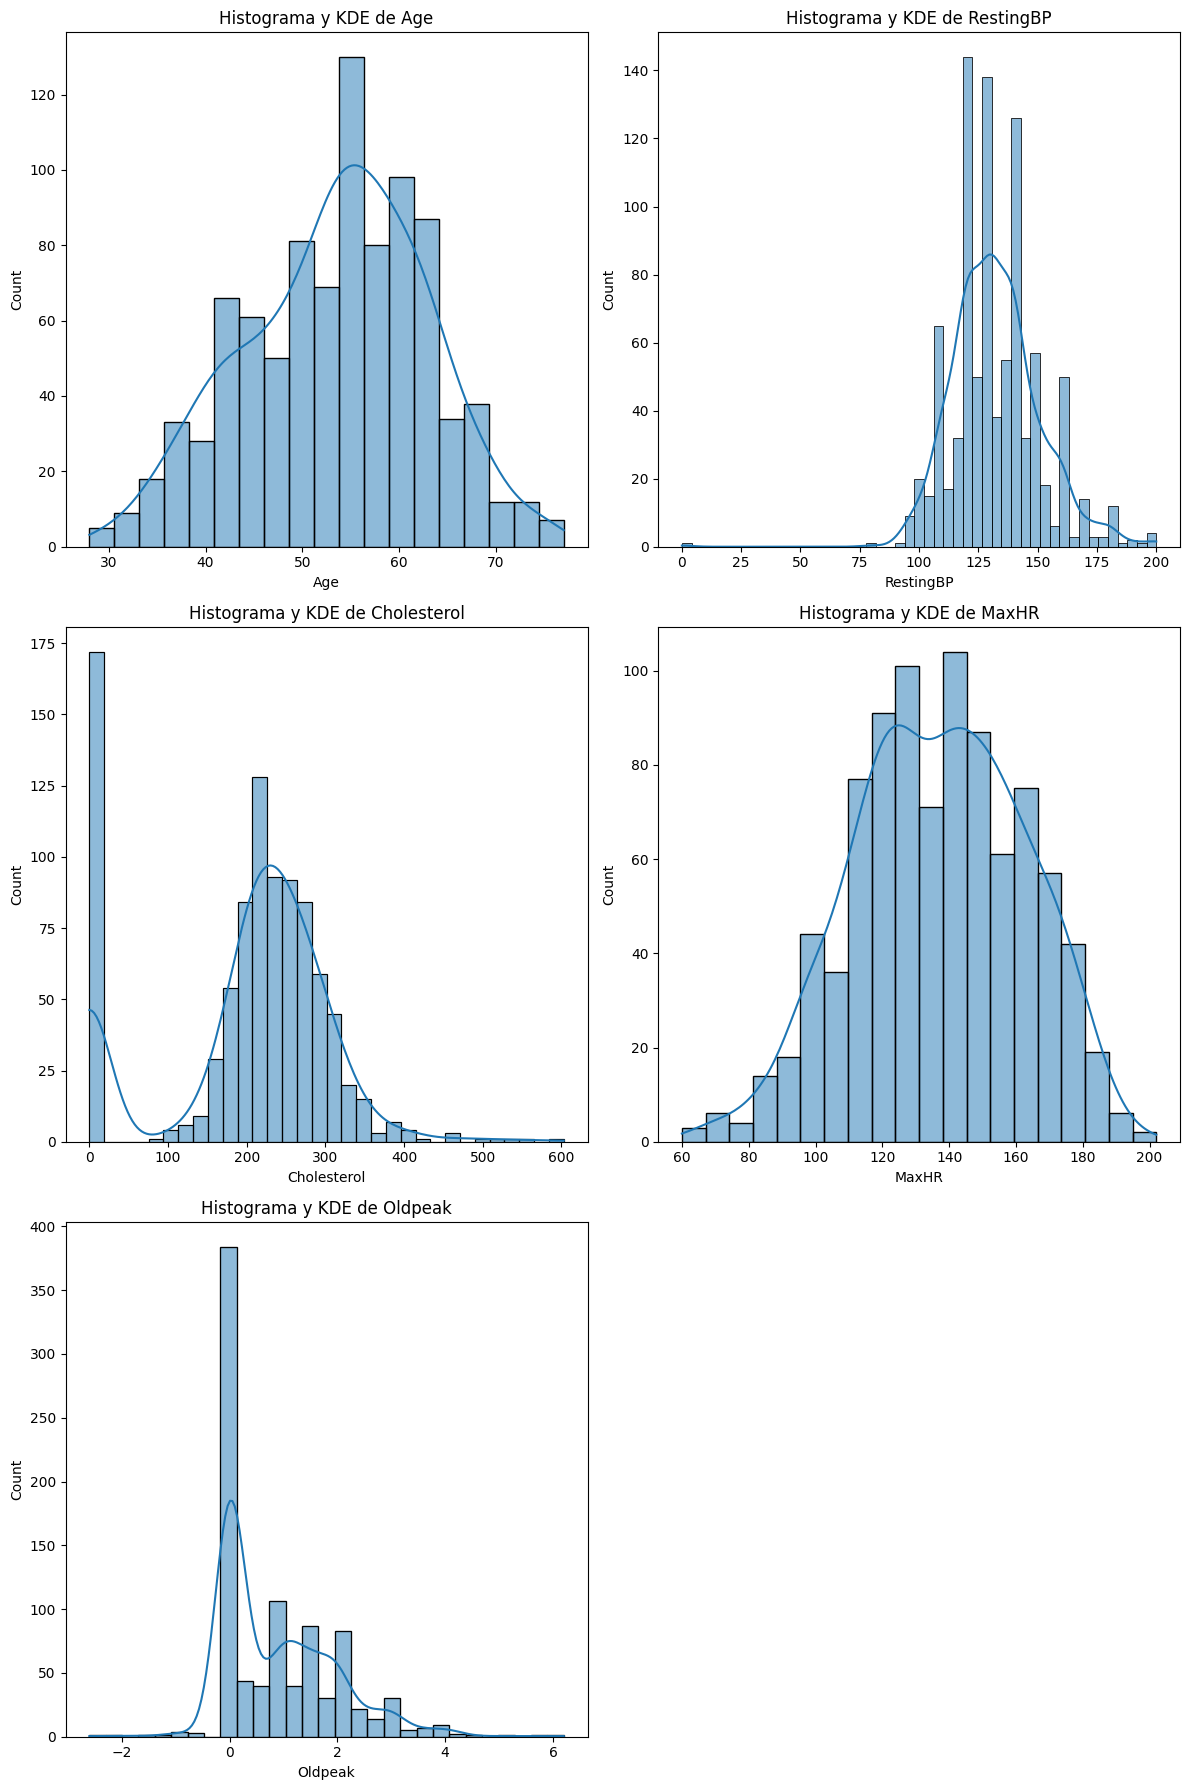

In [33]:
plot_histo_den(df_exp, cols_numericas)

*Y ahora posterior a la eliminación de outliers*

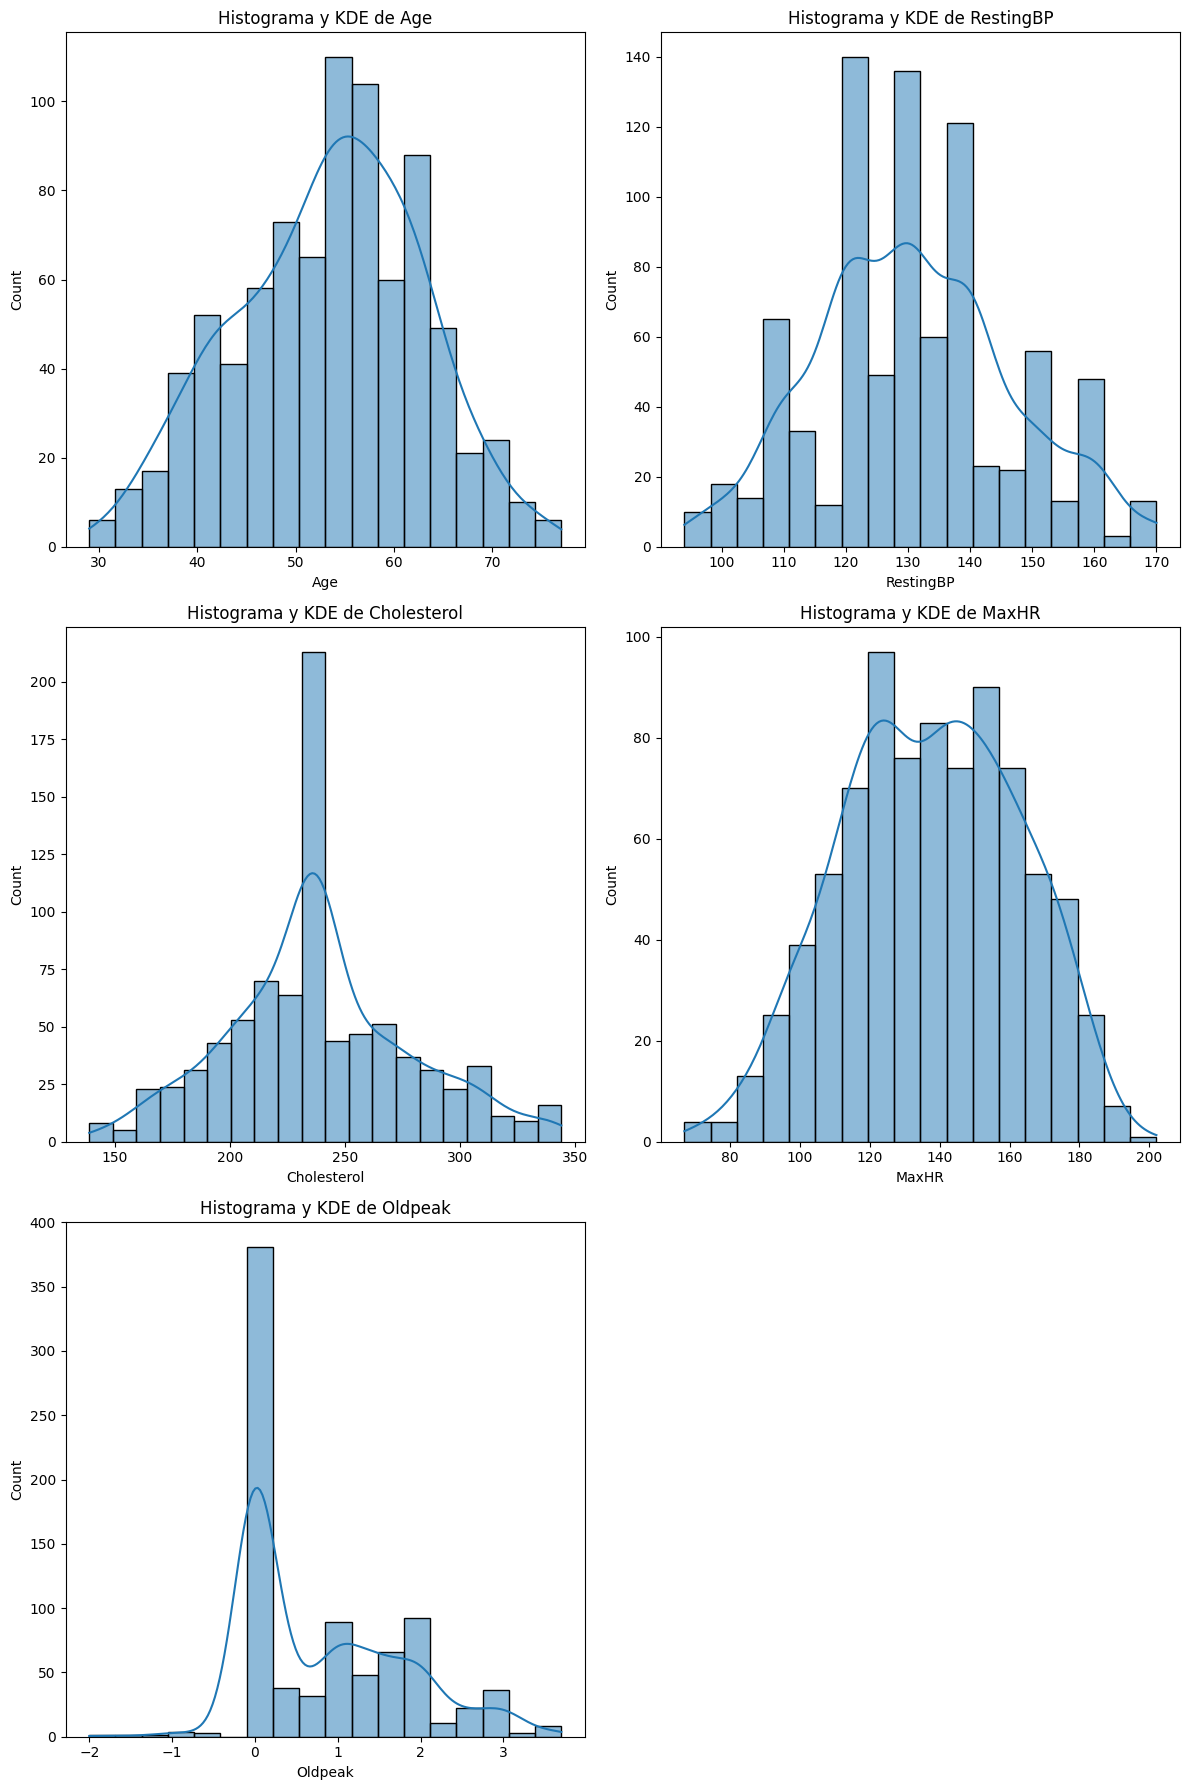

In [34]:
plot_histo_den(df_uso, cols_numericas)

*Como no podemos asegurar que se asemejen a una normal, vamos a hacer un par de tests para comprobarlo*

In [35]:
# Test de Shapiro. Tiene como hipótesis nula que la variable numérica se asemeja a una normal

for columna in cols_numericas:
    stat, p_val = shapiro(df_uso[columna])
    print(f"Shapiro: {columna}: Valor P-Value = {p_val}")
    if p_val > 0.05:
        print(f"Se acepta la hipótesis nula: Los datos parecen seguir una distribución normal.\n")
    else:
        print(f"Se rechaza la hipótesis nula: Los datos NO parecen seguir una distribución normal.\n")
    print("----------------")

Shapiro: Age: Valor P-Value = 7.342327831029582e-05
Se rechaza la hipótesis nula: Los datos NO parecen seguir una distribución normal.

----------------
Shapiro: RestingBP: Valor P-Value = 1.6659677689269495e-08
Se rechaza la hipótesis nula: Los datos NO parecen seguir una distribución normal.

----------------
Shapiro: Cholesterol: Valor P-Value = 1.6707263088838205e-09
Se rechaza la hipótesis nula: Los datos NO parecen seguir una distribución normal.

----------------
Shapiro: MaxHR: Valor P-Value = 3.0002051170503647e-05
Se rechaza la hipótesis nula: Los datos NO parecen seguir una distribución normal.

----------------
Shapiro: Oldpeak: Valor P-Value = 1.654617025817644e-26
Se rechaza la hipótesis nula: Los datos NO parecen seguir una distribución normal.

----------------


In [36]:
# Test de Anderson. Podemos comprobar si la variable numérica se asemeja a una determinada distribución (en nuestro caso una normal) o no

for columna in cols_numericas:
    stat, crit_values, sig_levels = anderson(df_uso[columna], dist="norm")

    print(f"Distribución estudiada: Normal")
    print(f"Columna estudiada: {columna}")
    print(f"Estadístico de la prueba: {stat}")
    print(f"Valores críticos: {crit_values}")
    print(f"Niveles de significancia: {sig_levels}")
    if stat > crit_values[2]:  # El valor crítico para el 5% de significancia
        print("Rechazamos la hipótesis nula: los datos NO siguen la distribución")
    else:
        print("No se rechaza la hipótesis nula: los datos podrían seguir la distribución")
    print("-------------------------")

Distribución estudiada: Normal
Columna estudiada: Age
Estadístico de la prueba: 2.326699278210185
Valores críticos: [0.573 0.653 0.783 0.914 1.087]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Rechazamos la hipótesis nula: los datos NO siguen la distribución
-------------------------
Distribución estudiada: Normal
Columna estudiada: RestingBP
Estadístico de la prueba: 5.0443451872307605
Valores críticos: [0.573 0.653 0.783 0.914 1.087]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Rechazamos la hipótesis nula: los datos NO siguen la distribución
-------------------------
Distribución estudiada: Normal
Columna estudiada: Cholesterol
Estadístico de la prueba: 7.766634009556128
Valores críticos: [0.573 0.653 0.783 0.914 1.087]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Rechazamos la hipótesis nula: los datos NO siguen la distribución
-------------------------
Distribución estudiada: Normal
Columna estudiada: MaxHR
Estadístico de la prueba: 2.1096670791131373
Valor

*Como podemos comprobar más arriba en los tests de Saphiro y de Anderson las variables no se pueden asemejar a una normal*

### ANÁLISIS BIVARIANTE

#### CATEGÓRICAS

In [37]:
# # Este bucle sirve para tener una visualización de una columna categórica con el resto de columnas categórica.
# # No lo vamos a utilizar en este caso, pero lo dejo por si sirviera cara a futuro

# for columna in cols_categoricas_nominales:
#     for i in range(len(cols_categoricas_nominales)):
#         if columna != cols_categoricas_nominales[i]:
#             plot_categorical_relationship_fin(df_uso, columna, cols_categoricas_nominales[i], relative_freq = True, show_values = True)

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


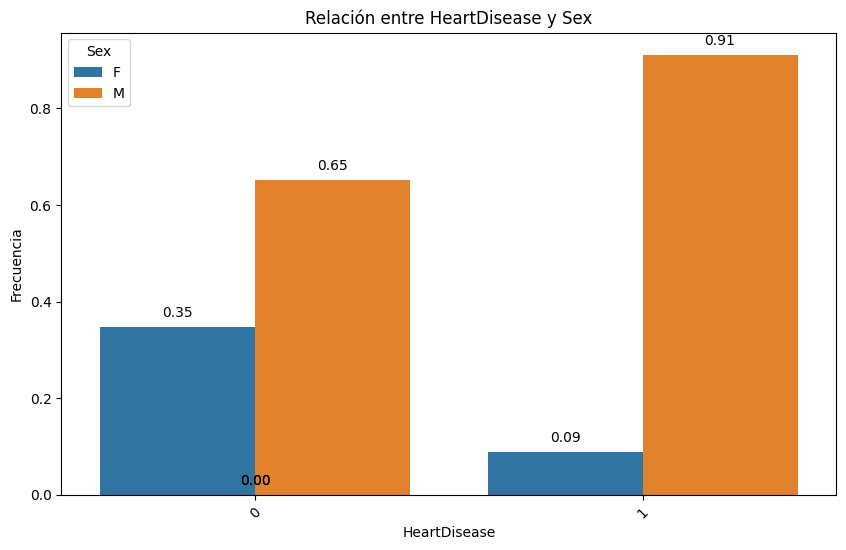

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


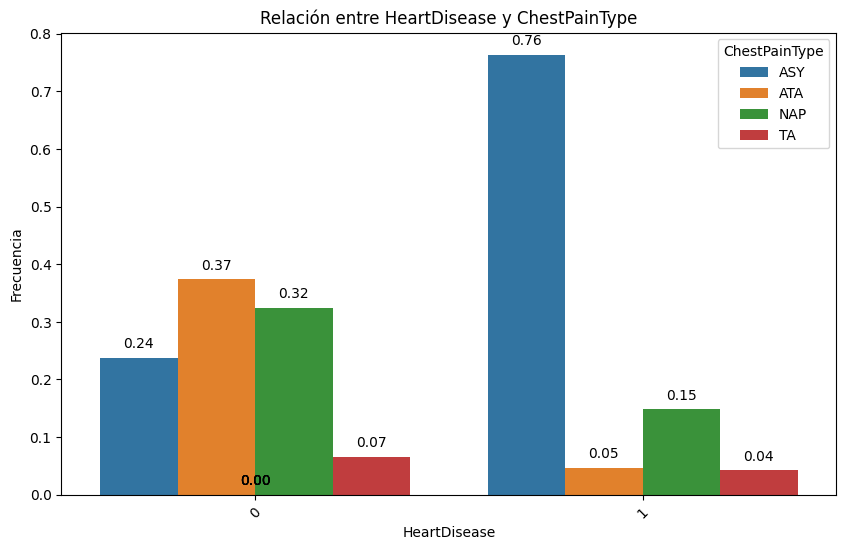

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


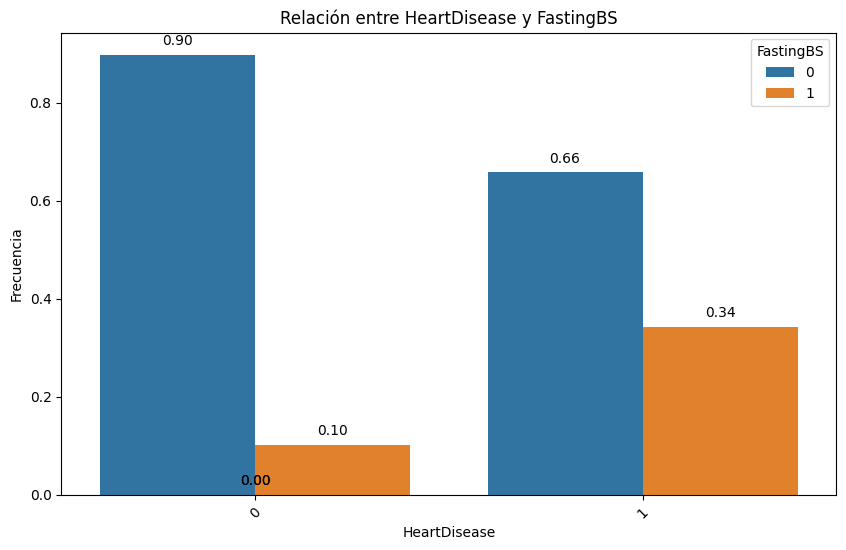

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


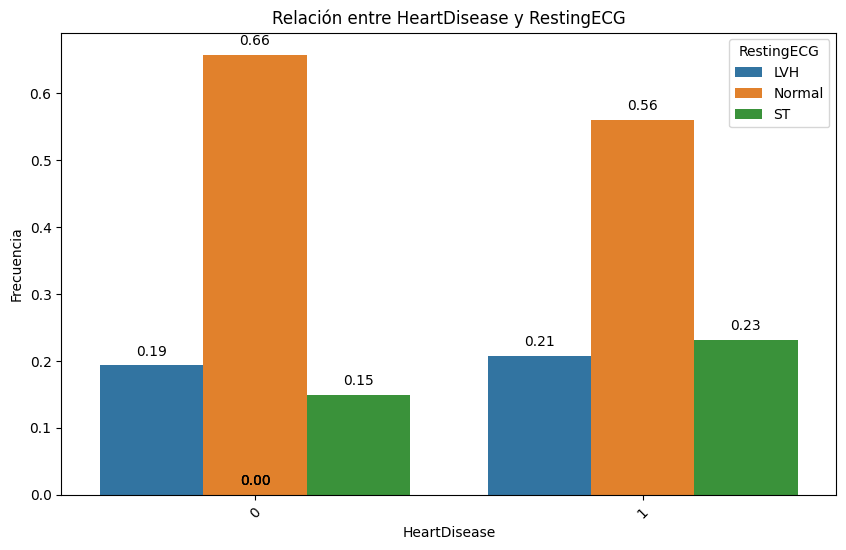

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


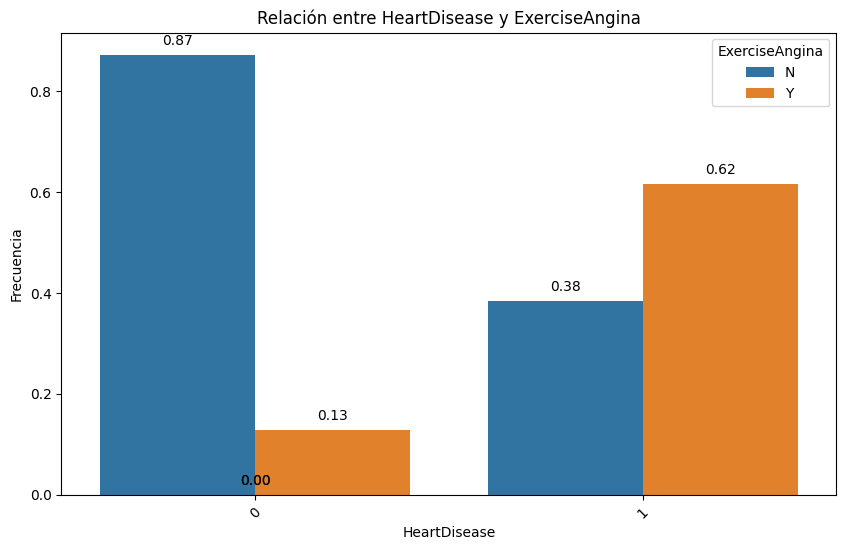

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


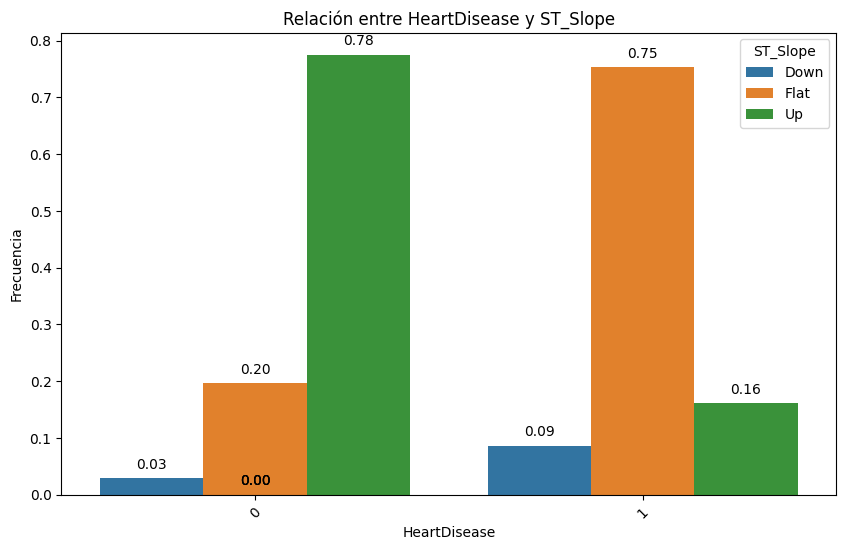

In [38]:
for i in range(len(cols_categoricas_nominales)):
    if "HeartDisease" != cols_categoricas_nominales[i]:
        plot_categorical_relationship_fin(df_uso, "HeartDisease", cols_categoricas_nominales[i], relative_freq = True, show_values = True)

*Comentarios:*

- *Si bien la proporción de hombres vs mujeres de la muestra es de un 80-20%, se puede comprobar que el 91% de los hombres han sufrido una enfermedad cardíaca vs 9% de las mujeres analizadas. De todas formas esto no se puede generalizar sin una muestra de mujeres mayor*
- *Es curioso que el 76% de la muestra que ha sufrido una enfermedad cardíaca no ha tenido síntomas*
- *El azúcar en sangre en ayunas suele estar por debajo de 120 (salida variable = 0) tanto en los casos en que no hay enfermedad cardíaca como en los que sí que la hay. Sí que cabe destacar que en los casos que hay enfermedad cardíaca los casos de azúcar en sangre aumentan (34%)*
- *ECG en reposo no veo que haya mucha relación. En ambos casos predomina el "Normal"*
- *En los casos de enfermedad cardíaca, sí que predomina la angina inducida por el ejercicio. Esto podría explicar el segundo punto, en el que la muestra que ha sufrido enfermedad cardíaca no ha tenido síntomas. Podemos hacer un multivariante posteriormente*
- *Interesante también que pasamos de una pendiente "alta" en los casos en que no hay enfermedad cardíaca a "plana" en los casos en que sí que la hay*


#### CATEGÓRICA - NUMÉRICA

Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. Empezamos con la mediana:

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:244: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


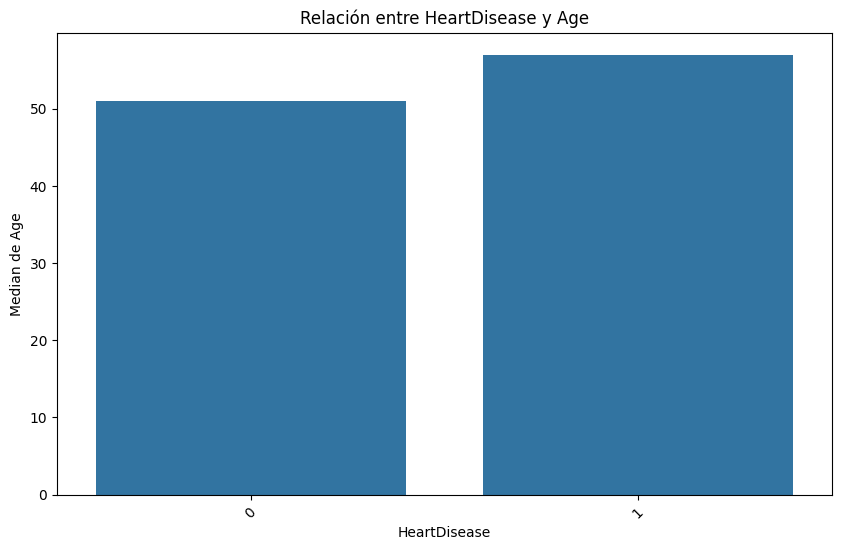

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:244: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


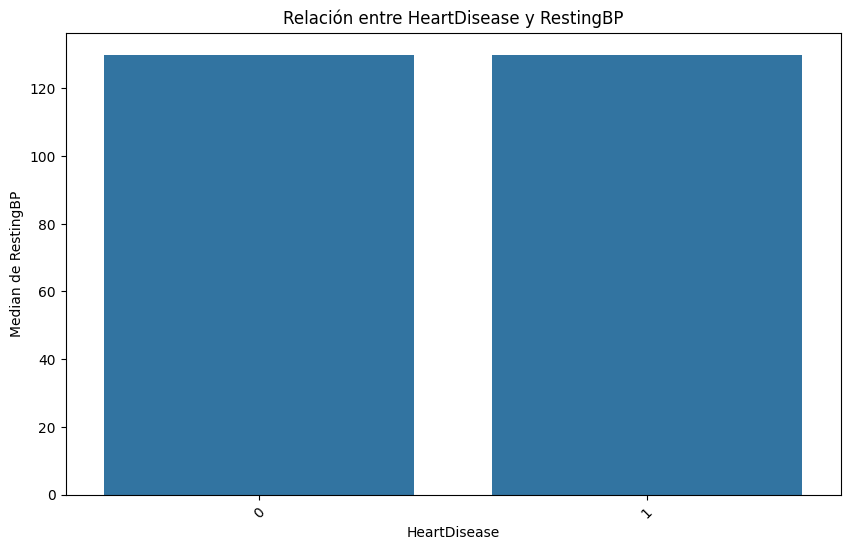

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:244: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


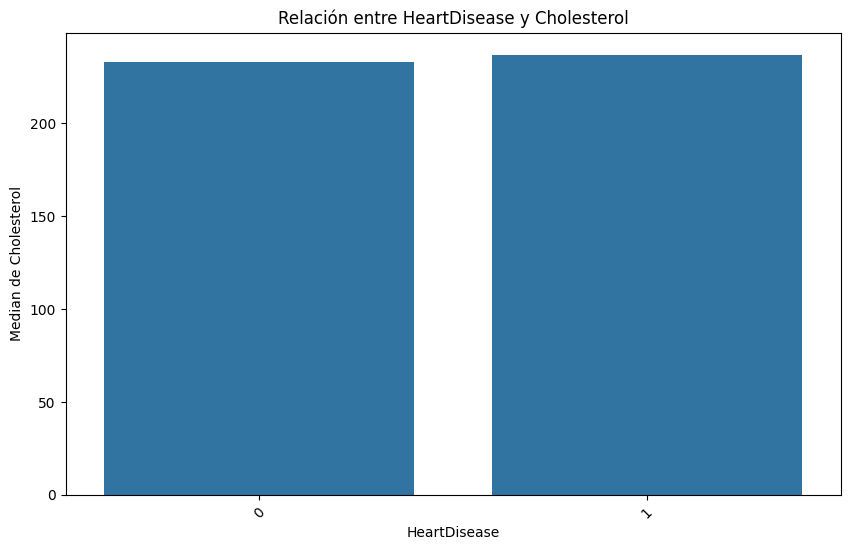

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:244: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


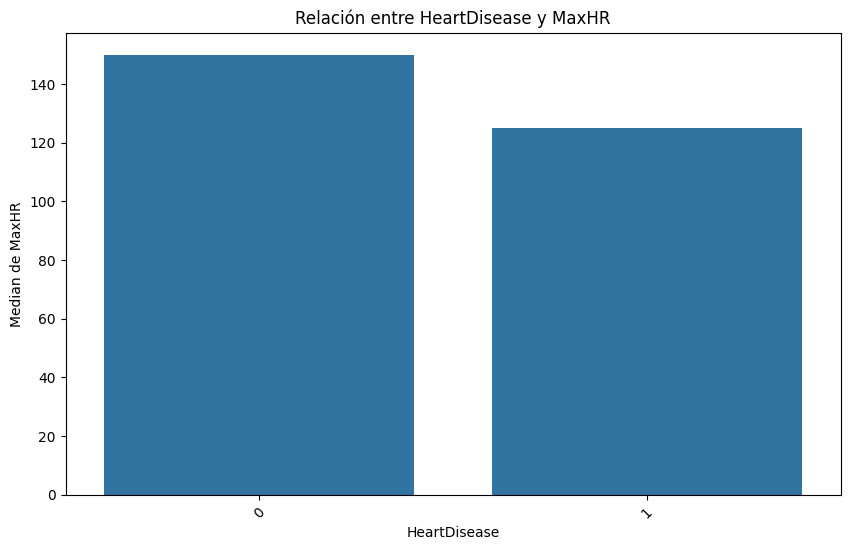

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:244: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


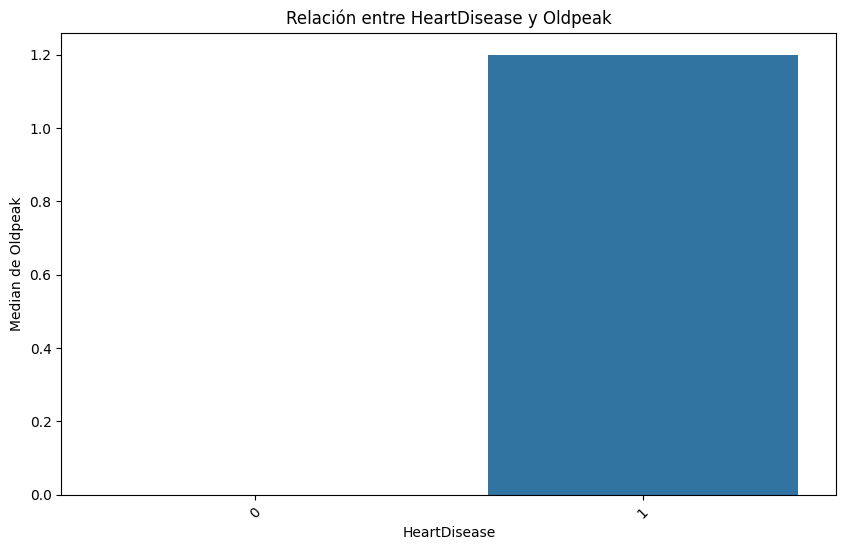

In [39]:
for i in range(len(cols_numericas)):
    plot_categorical_numerical_relationship(df_uso,"HeartDisease",cols_numericas[i], measure = "median")

Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. Comparemos los diagramas de caja:

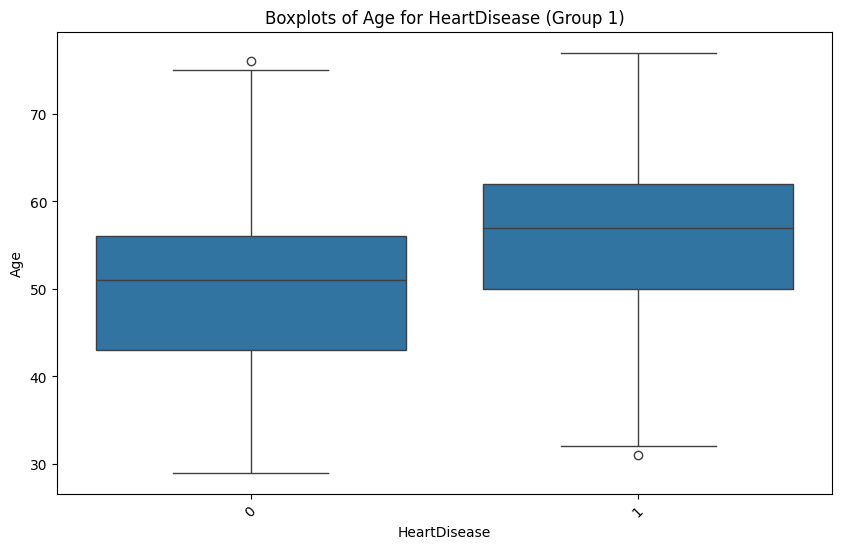

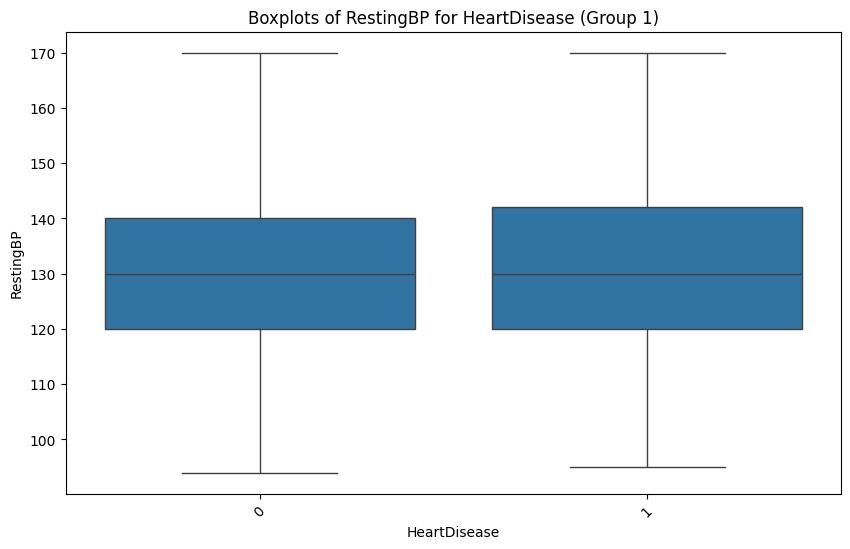

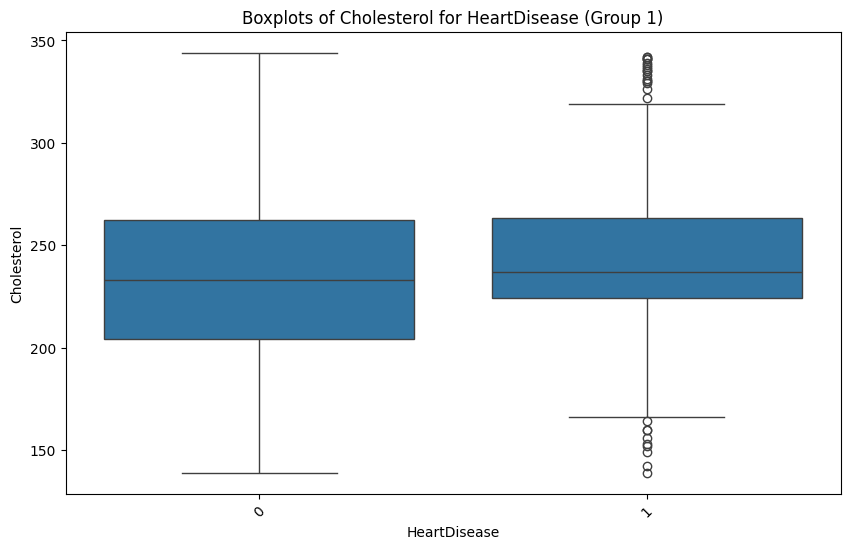

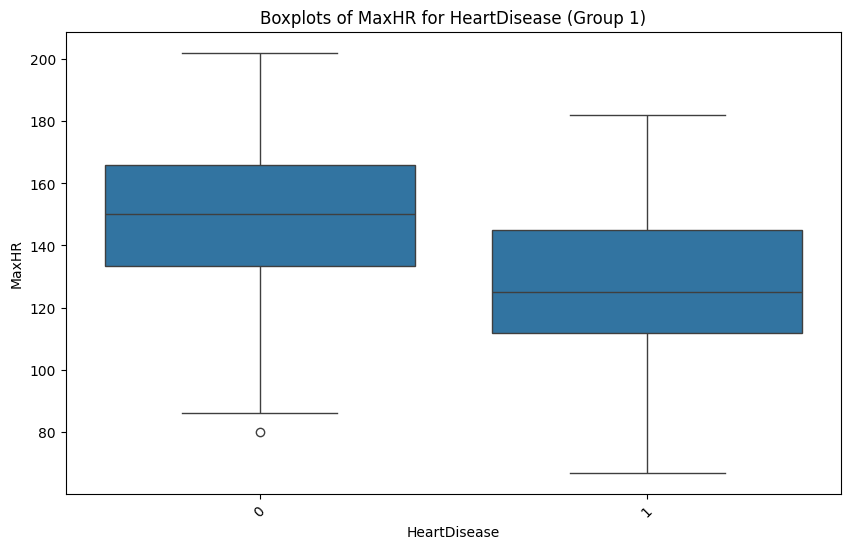

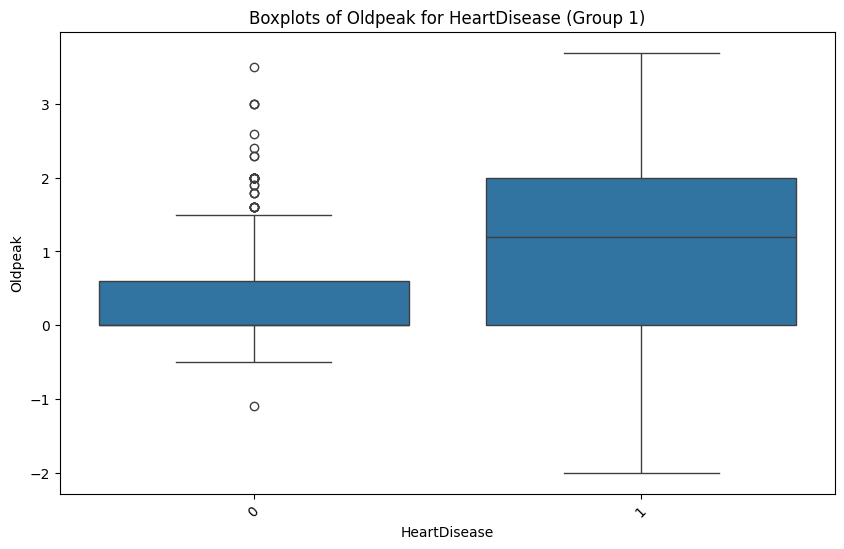

In [40]:
for i in range(len(cols_numericas)):
    plot_grouped_boxplots(df_uso,"HeartDisease",cols_numericas[i])

Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. Comparemos los histogramas:

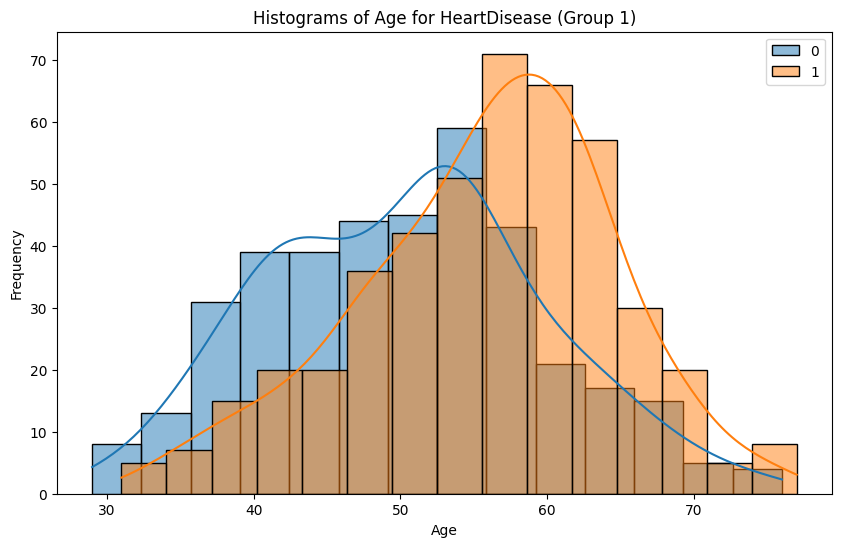

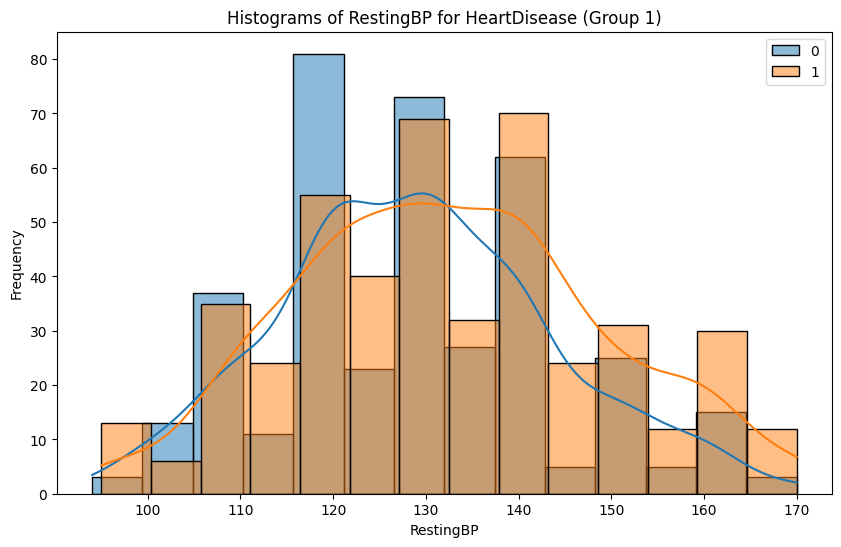

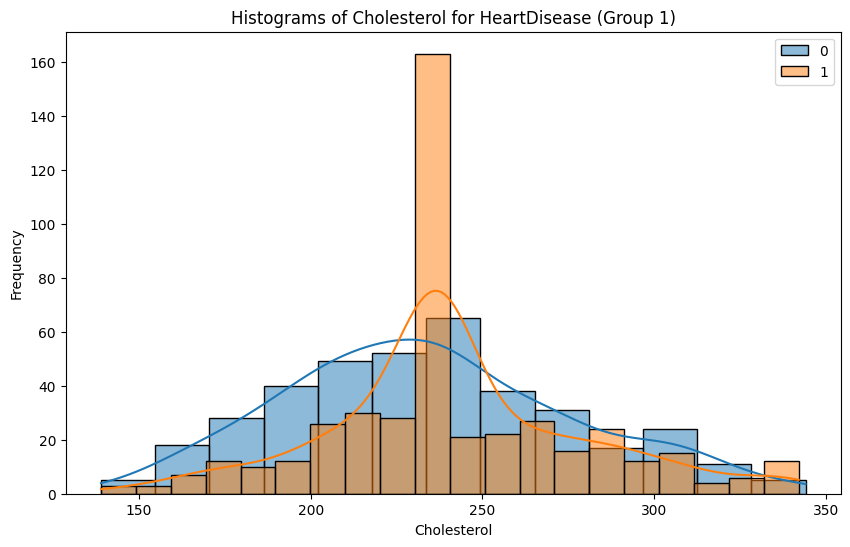

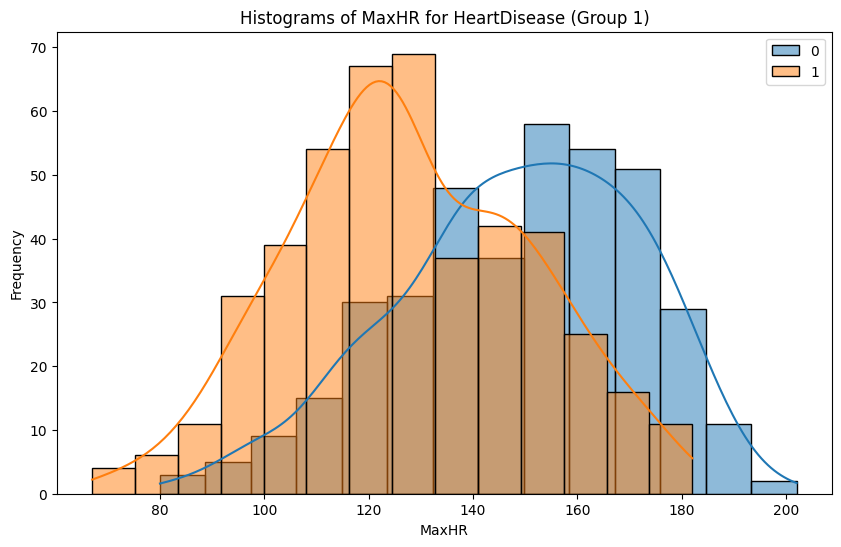

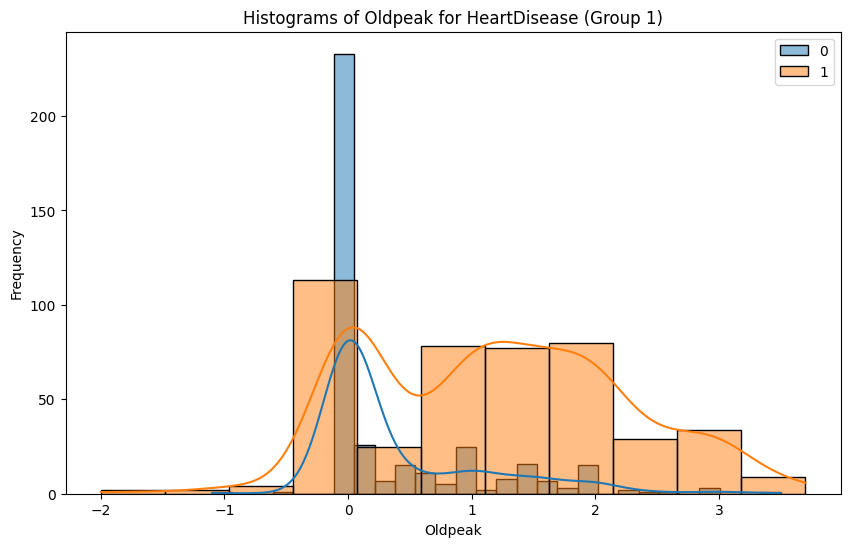

In [41]:
for i in range(len(cols_numericas)):
    plot_grouped_histograms(df_uso,"HeartDisease", cols_numericas[i], 2)

*Comentarios:*

- *Las enfermedades cardíacas ocurren en mayor medida a una edad de unos 58 años. Además, el IQR está en una posición mayor en este caso frente a NO enfermedad cardíaca, lo que podría indicar que a una edad mayor hay más riesgo de sufrir enfermedad cardíaca*
- *La presión arterial en reposo es la misma tanto si se ha tenido o no enfermedad cardíaca (en torno a 130)*
- *La mediana del colesterol es la misma tanto si se ha tenido o no enfermedad cardíaca (225). Eso también nos podría indicar que a un colesterol mayor (225) hay más riesgo de que haya enfermedad cardíaca. Además, el IQR es menor en el caso de afección cardíaca lo que podría reafirmar esta posición*
- *Es curioso que las máximas pulsaciones sean inferiores si se ha tenido enfermedad cardíaca que si no se ha tenido*
- *El IQR de "Oldpeak" en los casos en que ha habido enfermedad cardíaca es mucho más amplio y con un percentil 75% de casi 2. Esto podría indicar que el tener depresión (y dependiendo del grado) podría afectar de forma considerable a sufrir una afección cardíaca* 

#### NUMÉRICAS

In [42]:
# No aplica

### ANÁLISIS MULTIVARIANTE

#### CATEGÓRICAS

In [43]:
# Pendiente indicar lo que veo

Hacemos un análisis multivariante entre "HeartDisease", "ChestPainType" y "ExerciseAngina" por lo que habíamos detectado en el análisis bivariante

In [44]:
columnas = ["HeartDisease","ChestPainType","ExerciseAngina"] 
col_directora = "HeartDisease"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_uso[col_directora].unique():
    diccionario_multivariante[valor] = df_uso.loc[df_uso[col_directora] == valor,[col_2,col_1]]

Respuesta HeartDisease = 0:


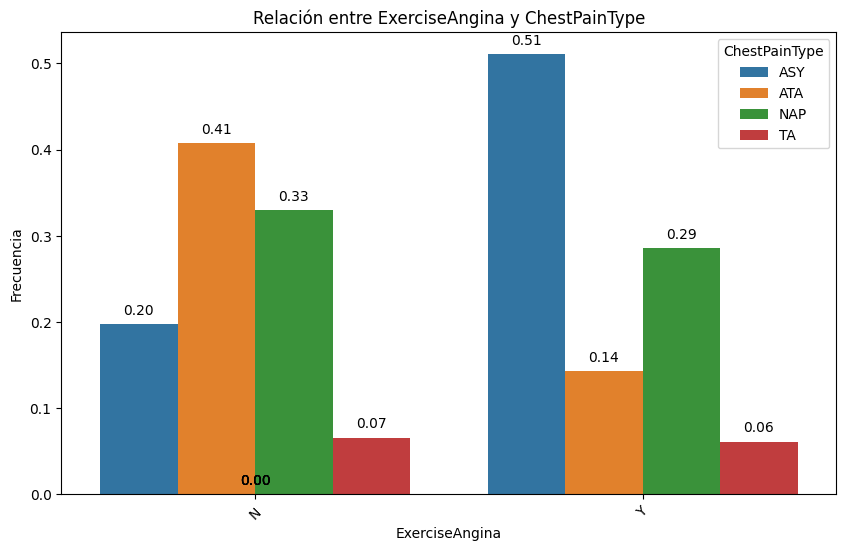

Respuesta HeartDisease = 1:


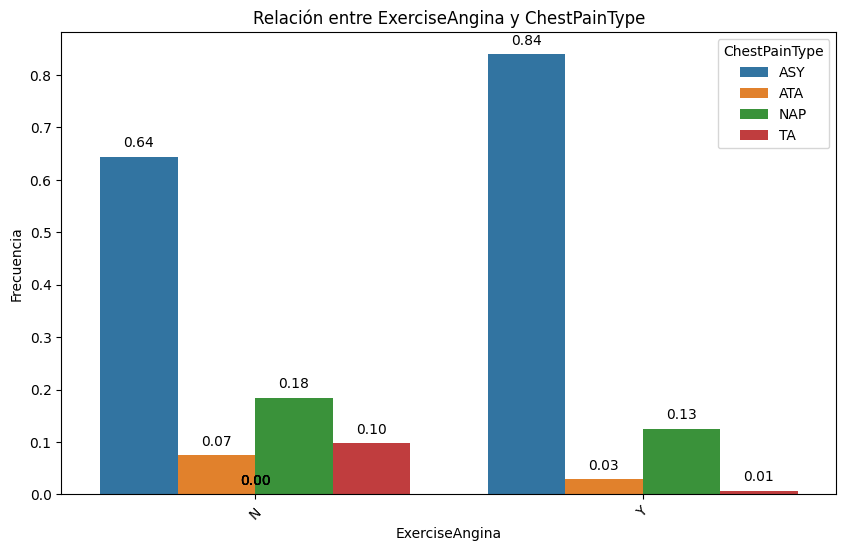

In [45]:
for valor, df_datos in diccionario_multivariante.items():
    print(f"Respuesta {col_directora} = {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

*Esto podría decirnos que en caso de afección cardíaca lo normal es que no haya síntomas tanto si la angina de pecho procede del ejecicio como si no*

#### NUMÉRICAS

In [46]:
corr_matrix = df_uso.corr(numeric_only = True) # Si no lo pones y tienes variables tipo texto, fallará

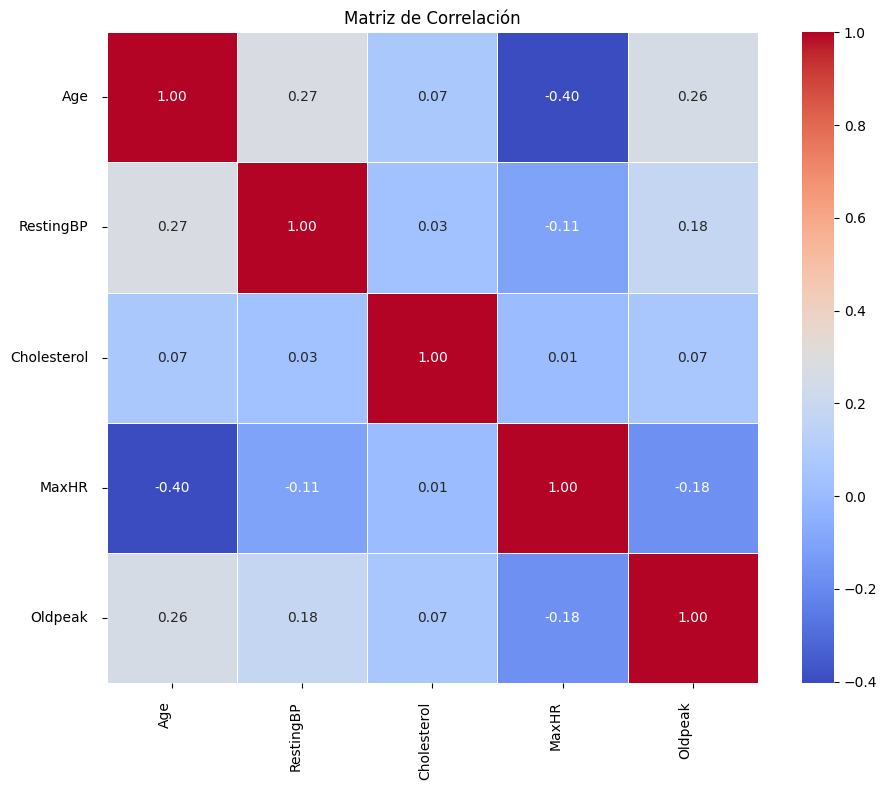

In [47]:
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura

# Crear el heatmap con seaborn
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                 cbar=True, square=True, linewidths=.5)

plt.title('Matriz de Correlación')

# Rotar las etiquetas de los ejes X y Y
plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X
plt.yticks(rotation=0, ha='right')  # Rotar y alinear las etiquetas de las Y

# Ajustar el espaciado entre las etiquetas y los ejes con `ax.tick_params()`
ax.tick_params(axis='x', which='major', pad=10)  # Añadir espacio en el eje X
ax.tick_params(axis='y', which='major', pad=10)  # Añadir espacio en el eje Y

# Ajustar automáticamente el espaciado para evitar superposición
plt.tight_layout()

plt.show()

*Según el heatmap habría algo de correlación negativa entre "MaxHR" y "Age". Lo vamos a comprobar más abajo* 

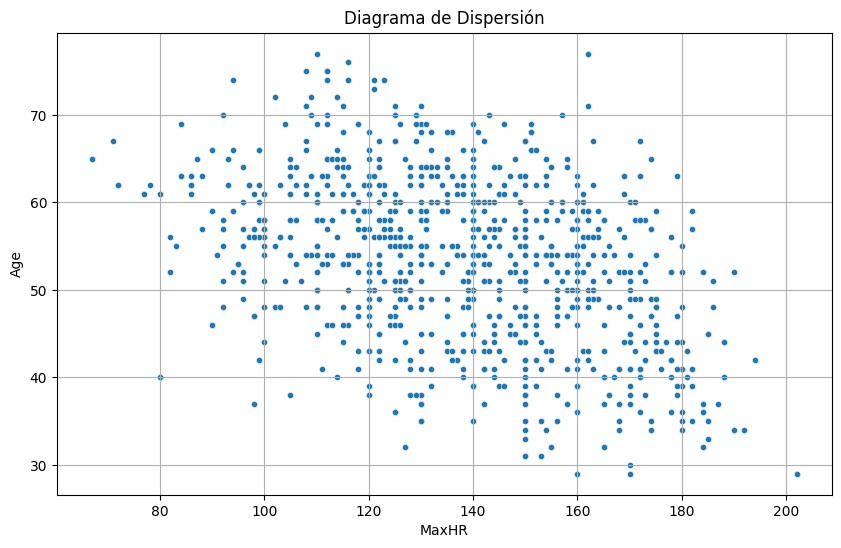

In [48]:
grafico_dispersion_con_correlacion(df_uso,"MaxHR","Age", 20)

*Se puede apreciar como bien indicaba el 'heatmap' algo de correlación negativa, pero es bastante pobre*

### ANÁLISIS DE RELACIONES

#### CATEGÓRICA - CATEGÓRICA

In [49]:
for columna_i in cols_categoricas_nominales:
    for columna_j in cols_categoricas_nominales:
        if columna_i != columna_j:
            tabla_contingencia = pd.crosstab(df_uso[columna_i], df_uso[columna_j])
            chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
            print(f"Test Chi-Cuadrado para {columna_i} - {columna_j}")
            print("Valor Chi-Cuadrado:", chi2)
            print("P-Value:", p)
            print("Grados de Libertad:", dof)
            print("--------------------")
            # print("Tabla de Frecuencias Esperadas:\n", expected)

Test Chi-Cuadrado para Sex - ChestPainType
Valor Chi-Cuadrado: 37.28022431529929
P-Value: 4.014160358537242e-08
Grados de Libertad: 3
--------------------
Test Chi-Cuadrado para Sex - FastingBS
Valor Chi-Cuadrado: 11.332839236195857
P-Value: 0.0007614838600046627
Grados de Libertad: 1
--------------------
Test Chi-Cuadrado para Sex - RestingECG
Valor Chi-Cuadrado: 2.7302608514690903
P-Value: 0.2553473699478529
Grados de Libertad: 2
--------------------
Test Chi-Cuadrado para Sex - ExerciseAngina
Valor Chi-Cuadrado: 36.12619075685164
P-Value: 1.8494436849589102e-09
Grados de Libertad: 1
--------------------
Test Chi-Cuadrado para Sex - ST_Slope
Valor Chi-Cuadrado: 23.02262125876281
P-Value: 1.0016161401379275e-05
Grados de Libertad: 2
--------------------
Test Chi-Cuadrado para Sex - HeartDisease
Valor Chi-Cuadrado: 83.23085820703072
P-Value: 7.300907813386308e-20
Grados de Libertad: 1
--------------------
Test Chi-Cuadrado para ChestPainType - Sex
Valor Chi-Cuadrado: 37.28022431529929


*Vale, cosas a destacar: Ya encontramos relaciones entre variables categóricas (p-value < 0.05). Tendrían relaciones todas las variables a excepción de las siguientes:*

- *Sex - RestingECG / P-Value: 0.2553473699478529*
- *FastingBS - ExerciseAngina / P-Value: 0.05608887745662361*
- *RestingECG - ST_Slope / P-Value: 0.21068982762865132*

#### CATEGÓRICA - NUMÉRICA

Aplicamos el test U de Mann-Whitney al tratar las distribuciones como NO normales (visto más arriba) y que la variable "HeartDisease" es binaria

In [50]:
for columna in cols_numericas:
    grupo_y = df_uso.loc[df_uso.HeartDisease == 1][columna]
    grupo_n = df_uso.loc[df_uso.HeartDisease == 0][columna]
    
    u_stat, p_valor = mannwhitneyu(grupo_y, grupo_n)

    print(f"HeartDisease vs {columna}")
    print("Estadístico U:", u_stat)
    print("Valor p:", p_valor)
    print("-----------------")

HeartDisease vs Age
Estadístico U: 116952.0
Valor p: 3.735487925024752e-18
-----------------
HeartDisease vs RestingBP
Estadístico U: 97705.5
Valor p: 0.0015660904206702719
-----------------
HeartDisease vs Cholesterol
Estadístico U: 97660.5
Valor p: 0.0016384281298301058
-----------------
HeartDisease vs MaxHR
Estadístico U: 45701.5
Valor p: 3.815621377849606e-32
-----------------
HeartDisease vs Oldpeak
Estadístico U: 126974.0
Valor p: 3.612758158782503e-33
-----------------


*Según el test U de Mann-Whitney SÍ que habría dependencia entre HeartDisease y el resto de variables numércias (p-value < 0.05)*



### CONCLUSIONES 

1. *¿Qué género tiene más probabilidad de sufrir enfermedad cardíaca?*

*Aunque no es concluyente por la cantidad de información que disponemos respecto a mujeres (el % de hombres vs mujeres es de 80-20), se deja entrever que los hombres sufren más afecciones cardíacas que las mujeres (91% vs 9%).
Se podría hacer un análisis posterior recogiendo más información de mujeres y aplicando lo realizado en este EDA. Futura línea de trabajo*

2. *¿Hay relación entre edad y enfermedad cardíaca? ¿En qué edad hay mayor probabilidad de sufrir enfermedad cardíaca?*

*Sí que hay relación entre edad y enfermedad cardíaca. Se puede apreciar que a una mayor edad hay mayor probabilidad de sufrir una enfermedad cardíaca. El percentil 25% se encuentra en 50 años, la mediana en 58 años y el 75% en unos 62 años*

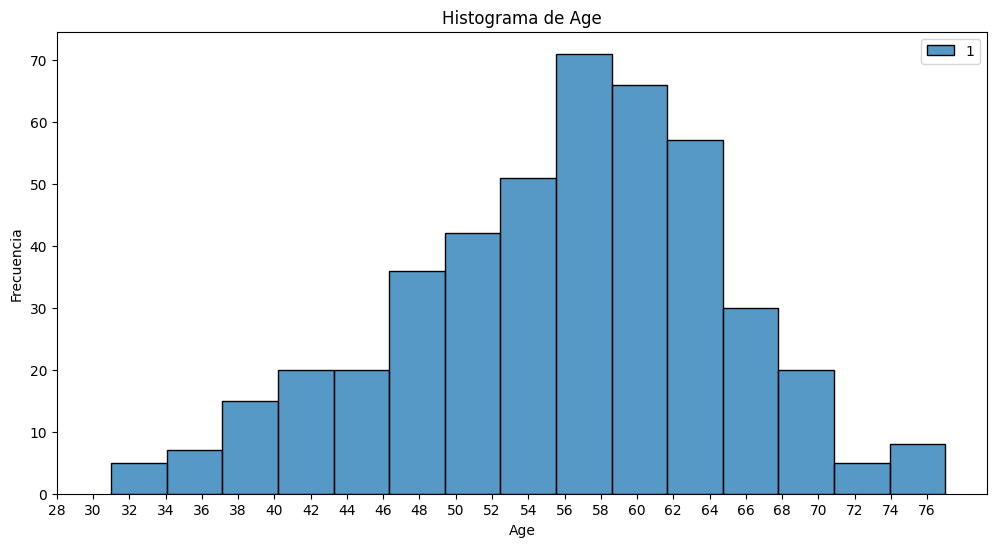

In [51]:
variable_categorica = "HeartDisease"
variable_numerica = "Age"

plt.figure(figsize=(12,6))
sns.histplot(df_uso.loc[df_uso[variable_categorica] == 1,variable_numerica], kde= False, label=valor)

x_min = df_uso[variable_numerica].min()
x_max = df_uso[variable_numerica].max()

x_ticks = np.arange(x_min - 1, x_max + 1, step=2)  # Cambia el paso según lo necesario
plt.xticks(x_ticks)
plt.legend()
plt.xlabel(variable_numerica)
plt.ylabel("Frecuencia")
plt.title("Histograma de " + variable_numerica)
plt.show()

3. *¿Cuál es el síntoma predominante en caso de afección cardíaca?*

*En caso de afección cardíaca, el síntoma predominante es precisamente ser asintomático (76%). Tras analizar con un poco más de detalle se aprecia la relación entre afección cardíaca y el ejercicio físico como agente inductor de la afección (de las afecciones cardíacas, el 62% tienen el ejercicio físico como inductor de la afección). Además, el 84% de las afeciones cardíacas con ejercicio como agente inductor son asíntomáticas*

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:184: RuntimeWarning: invalid value encountered in scalar divide
  count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)


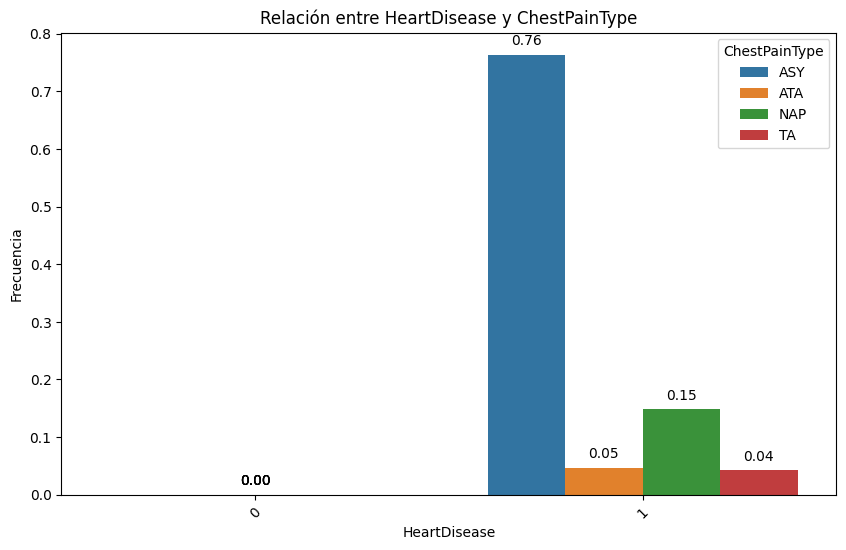

In [52]:
plot_categorical_relationship_fin(df_uso[df_uso["HeartDisease"] == 1], "HeartDisease", "ChestPainType", relative_freq = True, show_values = True)

c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\EDA_Entrega\notebooks\Funciones.py:184: RuntimeWarning: invalid value encountered in scalar divide
  count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)


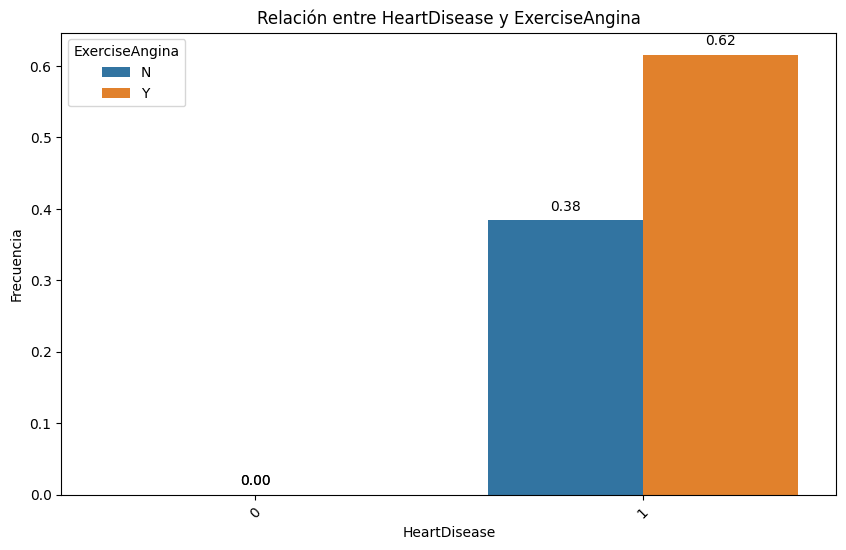

In [53]:
plot_categorical_relationship_fin(df_uso[df_uso["HeartDisease"] == 1], "HeartDisease", "ExerciseAngina", relative_freq = True, show_values = True)

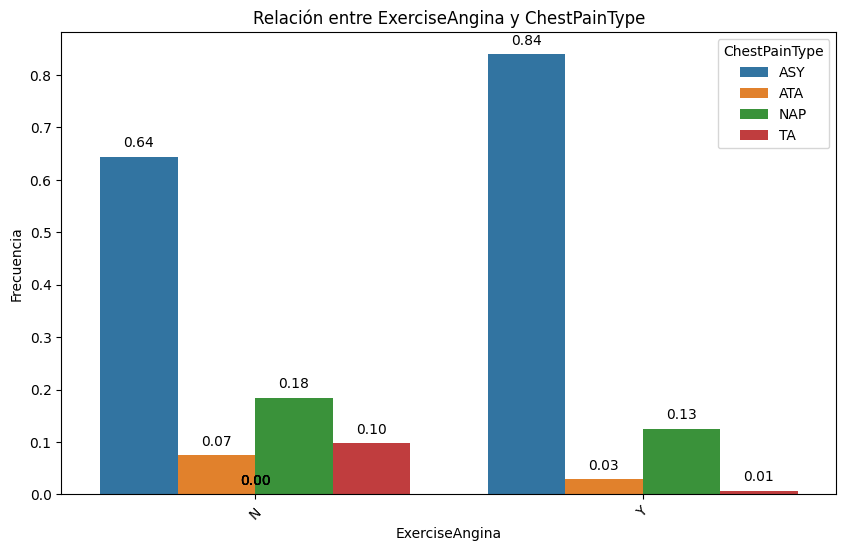

In [54]:
plot_categorical_relationship_fin(df_uso[df_uso["HeartDisease"] == 1], "ExerciseAngina", "ChestPainType", relative_freq = True, show_values = True)

4. *¿Hay relación entre el valor ST y enfermedad cardíaca?*

*Sí que podríamos indicar relación entre ambas. Mientras que un segmento ST en pacientes sin afección cardíaca tiene un IQR entre 0 y 0.5, los pacientes con afección cardíaca se mueven en un IQR mucho mayor (entre 0 y 2)* \
*Además, la pendiente del segmento ST pasa de creciente en paciente sin afección, a plana en pacientes con afección*

5. *¿Hay relación entre presión sanguínea en reposo y afección cardíaca?*

*En este caso sí que hay relación pero no se observa nada en un primer análisis. Se dejará como línea de trabajo futura*

6. *¿Hay relación entre el colesterol y afección cardíaca?*

*Sí que la hay. A niveles superior de colesterol hay mayor probabilidad de afección cardíaca (en rangos entre 225 y 250 se concentra más la probabilidad de sufrir afecciones)*

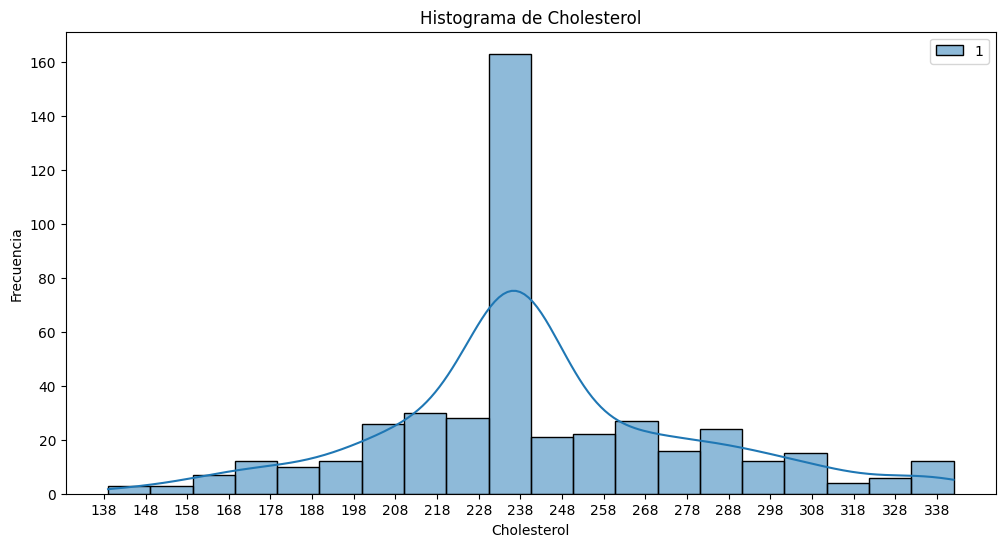

In [55]:
variable_categorica = "HeartDisease"
variable_numerica = "Cholesterol"

plt.figure(figsize=(12,6))
sns.histplot(df_uso.loc[df_uso[variable_categorica] == 1,variable_numerica], kde= True, label=valor)

x_min = df_uso[variable_numerica].min()
x_max = df_uso[variable_numerica].max()

x_ticks = np.arange(x_min - 1, x_max + 1, step=10)  # Cambia el paso según lo necesario
plt.xticks(x_ticks)
plt.legend()
plt.xlabel(variable_numerica)
plt.ylabel("Frecuencia")
plt.title("Histograma de " + variable_numerica)
plt.show()

7. *¿Hay relación entre ritmo cardíaco máximo y afección cardíaca?*

*Sí que la hay. En este caso se observa que en los casos en los que no hay afección cardíaca los ritmos cardíacos máximos son superiores (entre 138 y 162) mientras que en afecciones se encuentran entre 120 y 145*